# Latar Belakang

Dataset TSA Claims adalah kumpulan data yang berisi informasi tentang klaim kerugian yang diajukan ke Transportation Security Administration (TSA) di Amerika Serikat. 

TSA adalah lembaga pemerintah yang bertanggung jawab untuk keamanan transportasi dalam negeri, termasuk keamanan bandara. 

TSA Claims dataset berisi kurang lebih dari 200.000 catatan klaim yang dibuat oleh penumpang yang telah mengalami kerugian atau kehilangan barang pribadi selama proses keamanan di bandara atau selama perjalanan dengan maskapai penerbangan.

# Pernyataan Masalah

Pada project ini, saya memposisikan diri saya sebagai seorang data analyst di lembaga TSA. Tentunya hasil analisa yang saya lakukan, kesimpulan dan rekomendasi yang saya berikan harus memberikan efek yang positif terhadap lembaga dan juga penumpang. Untuk mencapai hal tersebut ada pertanyaan yang perlu kita jawab seperti :

<b>Bagaimana agar tingkat <i>claim</i> bisa diminimalisir dengan mencegah insiden, sehingga juga dapat mengurangi kerugian baik yang dialami penumpang, maskapai penerbangan, dan TSA ?</b>

# Data

In [98]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 1000

In [99]:
df = pd.read_csv('tsa_claims.csv', low_memory=False)

Kita akan melihat sampel 5 data paling atas, 5 data paling bawah dan banyaknya data.

In [100]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


Dataset ini memiliki jumlah data observasi sebanyak  204267 data dan jumlah variabel atau kolom sebanyak  13 .

Ini adalah deskripsi dari setiap kolom pada dataset TSA Claims :<br><br>
1.	Claim Number : Nomor unik yang diberikan kepada setiap klaim yang diajukan ke TSA.<br>
2.	Date Received : Tanggal ketika klaim diajukan ke TSA.<br>
3.	Incident Date : Tanggal ketika insiden kerugian atau kehilangan terjadi.<br>
4.	Airport Code : Kode bandara di mana insiden terjadi.<br>
5.	Airport Name : Nama bandara di mana insiden terjadi.<br>
6.	Airline Name : Nama maskapai penerbangan yang terkait dengan insiden.<br>
7.	Claim Type : Jenis klaim yang diajukan, misalnya kerusakan barang, kehilangan barang, keterlambatan penerbangan, dsb.<br>
8.	Claim Site : Lokasi di mana klaim tersebut diajukan.<br>
9.	Item : Deskripsi barang yang hilang atau rusak.<br>
10.	Claim Amount : Jumlah biaya yang diajukan untuk ganti rugi.<br>
11.	Status : Status klaim, apakah sudah diterima, ditolak, atau masih diproses.<br>
12.	Close Amount : Jumlah pembayaran yang dibuat oleh TSA sebagai ganti rugi.<br>
13.	Disposition : Keputusan akhir terkait dengan klaim, misalnya di-approve, di-settle, ditolak, atau lain-lain.<br>

## Overview

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


## Data Preparation (Data Understanding & Data Cleansing)

### Data Understanding
Tahap ini melibatkan pengumpulan informasi tentang data yang akan digunakan untuk analisis. Hal ini dilakukan untuk memahami karakteristik data dan menemukan anomali pada data, seperti tipe data, nilai yang tidak valid/obeservasi yang tidak masuk akal, data duplikat,format pada data, dan nilai yang hilang.

### Data Cleansing
Berdasarkan informasi yang kita peroleh ketika memahami data. Selanjutnya pada tahap ini kita akan menyelesaikan permasalahan yang ada pada data kita.

Sebelum lanjut, kita lihat sekilas overview dari datanya. Cukup banyak nilai yang kosong, hal ini terlihat jika kita membandingkan jumlah non-null dengan keseluruhan data.

### A. Pertama kita akan melihat tipe data dari masing-masing kolom data dataset.

In [102]:
df.dtypes

Claim Number     object
Date Received    object
Incident Date    object
Airport Code     object
Airport Name     object
Airline Name     object
Claim Type       object
Claim Site       object
Item             object
Claim Amount     object
Status           object
Close Amount     object
Disposition      object
dtype: object

Terlihat bahwa semua kolom pada dataset memiliki tipe data object. Tentunya ini tidaklah sepenuhnya sesuai karena untuk kolom seperti Date Received, Incident Date, Claim Amount, Close Amount tidak mungkin menggunakan tipe data object. Oleh karena itu kita akan mengubah tipe data kolom-kolom tadi menjadi yang seharusnya seperti :
* Date Received & Incident Date-> datetime
* Claim Amount & Close Amount -> float

Pertama kita akan coba merubah tipe data Date Received & Incident Date menjadi datetime.

In [103]:
df['Date Received'] = pd.to_datetime(df['Date Received'], errors='coerce')

In [104]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

Jika kita melihat pada data sampel di atas, pada kolom 'Date Received dan Incident Date' terdapat format tanggal yang berbeda. Lalu berhubung datanya sangat banyak, kita tidak mungkin mengecek satu per satu setiap format data pada kedua kolom tersebut. Oleh karena itu kita menggunakan parameter 'errors='coerce''. Penggunaan parameter 'errors='coerce'' digunakan untuk mengubah nilai yang tidak dapat diubah menjadi tipe data datetime menjadi NaT (Not a Time). Hal ini dapat terjadi jika terdapat nilai yang tidak valid atau tidak dapat diubah ke dalam format tanggal yang ditentukan.

Setelah langkah-langkah tersebut dilakukan, kolom 'Date Received dan Incident Date' pada dataframe akan berubah tipe data menjadi datetime dengan format yang sama untuk semua nilai pada kolom tersebut.
https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html'Date.

Berikut hasil akhirnya :

In [105]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN


Kedua kita akan coba merubah tipe data Claim Amount & Close Amount menjadi float.

Jika kita perhatikan kedua kolom ini juga memiliki beberapa nilai dengan format yang berbeda seperti '$350.00', '$70;000.00', dan '-'. Kita dapat mengubah tipe data dari kolom 'Claim Amount dan Close Amount' dengan menggunakan method 'pd.to_numeric()' untuk mengubah nilai ke dalam tipe data float, serta menggunakan method 'str.replace()' untuk mengganti karakter '$' dan ';' dengan karakter kosong, dan mengatasi nilai '-' dengan parameter 'errors='coerce'' yang akan mengubah nilai yang tidak dapat diubah menjadi NaN.

In [106]:
#contoh data yang tidak terlihat pada sampel
df[df['Claim Number'] == '2009091163539']['Claim Amount']

141522    $70;000.00 
Name: Claim Amount, dtype: object

In [107]:
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'].str.replace('$', '').str.replace(';', ''), errors='coerce')

In [108]:
df['Close Amount'] = pd.to_numeric(df['Close Amount'].str.replace('$', '').str.replace(';', ''), errors='coerce')

Setelah langkah-langkah tersebut dilakukan, kolom 'Claim Amount dan Close Amount' pada dataframe akan berubah tipe data menjadi float, dan nilai-nilai yang memiliki format yang berbeda seperti '$350.00', '$70;000.00', dan '-' sudah diubah ke dalam format yang sama.

In [109]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,NaN,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,-,NaN,NaN


In [110]:
df[df['Claim Number'] == '2009091163539']['Claim Amount']

141522    70000.0
Name: Claim Amount, dtype: float64

In [111]:
df.dtypes

Claim Number             object
Date Received    datetime64[ns]
Incident Date    datetime64[ns]
Airport Code             object
Airport Name             object
Airline Name             object
Claim Type               object
Claim Site               object
Item                     object
Claim Amount            float64
Status                   object
Close Amount            float64
Disposition              object
dtype: object

Setelah selesai, mari kita cek kembali tipe data yang terbaru. Terlihat tipe data sudah sesuai seperti yang diharapkan. Jadi kita bisa melihat sekilas deskripsi dari dataset.

In [112]:
display(df.describe(), df.describe(include='object'))

,Claim Amount,Close Amount
count,1.874720e+05,135315.000000
mean,1.609638e+07,98.293415
std,6.928745e+09,925.832118
min,0.000000e+00,0.000000
25%,2.665000e+01,0.000000
50%,1.150000e+02,0.000000
75%,3.500000e+02,70.000000
max,3.000000e+12,250000.000000


,Claim Number,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Status,Disposition
count,204267,195743,195743,169893,196354,203527,200301,204262,131359
unique,204244,465,485,318,11,6,4704,15,3
top,2013123010324,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,Denied,Deny
freq,2,9596,9232,17553,117868,159753,36908,68339,68382


### B. Data/Observasi yang tidak valid atau tidak masuk akal

In [113]:
df[df['Claim Number'] == '0202417M']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.0,Settled,50.0,Settle


Jika kita perhatikan, terdapat data di mana Date Received kurang dari Incident Date artinya tanggal ketika klaim diajukan ke TSA kurang dari tanggal ketika insiden kerugian atau kehilangan terjadi. Ini tidaklah masuk akal karena bagaimana mungkin klaim diajukan terlebih dahulu sebelum insiden terjadi. Oleh karena itu kita akan menghapus data yang seperti ini karena data yang tidak valid dapat menyebabkan bias dalam analisis data dan mempengaruhi akurasi hasil analisis.
Jika kita membiarkan data yang tidak valid tersebut dalam dataset, hal ini dapat menghasilkan kesalahan dalam menghitung rata-rata, standar deviasi, atau nilai lainnya dalam analisis statistik. Selain itu, data yang tidak valid dapat menyebabkan perbedaan dalam hasil analisis dan membuat kesimpulan yang tidak akurat tentang fenomena yang sedang diamati.

In [114]:
df[df['Date Received'] < df['Incident Date']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185745,2013111809508,2013-11-16,2013-11-16 11:22:00,EWR,Newark International Airport,UAL,Passenger Property Loss,Checkpoint,Cosmetics & Grooming,0.00,Deny,NaN,NaN
185827,2013112509637,2013-11-20,2013-11-20 06:00:00,LAX,Los Angeles International Airport,UAL,Property Damage,Checked Baggage,-,NaN,-,NaN,NaN
186051,2013120509848,2013-12-02,2013-12-02 07:00:00,DFW,Dallas-Fort Worth International Airport,Jet Blue,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,-,NaN,NaN
186298,2013121810132,2013-12-11,2013-12-11 12:20:00,-,-,-,Property Damage,Checkpoint,Baggage/Cases/Purses,NaN,-,NaN,NaN


In [115]:
df[df['Claim Number'] == '2013111809508']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
185745,2013111809508,2013-11-16,2013-11-16 11:22:00,EWR,Newark International Airport,UAL,Passenger Property Loss,Checkpoint,Cosmetics & Grooming,0.0,Deny,NaN,NaN


Ketika kita coba melihat data di mana Date Received kurang dari Incident Date, masih terdapat data yang nilai Date Received dan Incident Date sama, karena kita melihat masih ada unsur jam pada kolom Incident Date. 

Di sisi lain dalam hal ini masih cukup masuk akal jika kejadian dan klaim terdapat pada hari yang sama.

Oleh karena itu data yang seperti ini akan kita pertahankan, sehingga kita perlu mengeluarkan data-data tersebut dari filter Date Received kurang dari Incident Date.

In [116]:
df['Date Received'] = df['Date Received'].dt.floor('D')
df['Incident Date'] = df['Incident Date'].dt.floor('D')

Kita ambil kembali data date saja dan menghilangkan unsur jam sehingga tidak akan diperhitungkan pada filter Date Received kurang dari Incident Date.

In [117]:
df[df['Date Received'] < df['Incident Date']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160944,2011061784423,2011-06-08,2011-06-17,ZZX,Non TSA Airport (motor vehicle),Delta (Song),Property Damage,Motor Vehicle,-,NaN,-,NaN,NaN
161027,2011062284549,2011-06-10,2011-06-22,SAN,San Diego International,American Airlines,Passenger Property Loss,Checked Baggage,Medical/Science,NaN,-,NaN,NaN
161035,2011062384567,2011-06-10,2011-06-23,PHF,Newport News / Williamsburg International,-,Property Damage,Checked Baggage,Clothing,NaN,-,NaN,NaN
161154,2011070184895,2011-06-14,2011-07-01,-,-,-,Property Damage,Checkpoint,Clothing,NaN,-,NaN,NaN


Terlihat bahwa data/observasi sudah berkurang yang artinya nilai Date Received dan Incident Date sama sudah tidak ada. 

Selanjutnya kita bisa langsung menhapus data dengan filter nilai Date Received kurang dari Incident Date.

In [118]:
df.drop(df[df['Date Received'] < df['Incident Date']].index, axis=0, inplace=True)

In [119]:
df[df['Date Received'] < df['Incident Date']]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition


Terlihat bahwa data/observasi klaim yang diajukan terlebih dahulu sebelum insiden terjadi sudah tidak ada.

### C. Data Duplikat

In [120]:
df.loc[df.duplicated()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16842,2004050450432,2003-09-26,2003-09-13,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,NaN,NaN


Terdapat sepasang data yang duplikat yakni untuk claim number 2004050450432. Mari kita cek kembali.

In [121]:
df[df['Claim Number'] == '2004050450432']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
16841,2004050450432,2003-09-26,2003-09-13,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,NaN,NaN
16842,2004050450432,2003-09-26,2003-09-13,NaN,NaN,NaN,Property Damage,Checked Baggage,DVD/CD Players,31.96,Canceled,NaN,NaN


Ternyata data dengan claim number 2004050450432 sama persis. Oleh karena itu, kita akan mendrop salah satunya.

In [122]:
df.drop_duplicates(inplace=True)
df.loc[df.duplicated()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition


Sudah tidak ada data yang duplikat

### D. Nilai Kosong / Null Values

#### 1. Penyeragaman Nilai Kosong

Mari kita lihat kembali gambaran datasetnya.

In [123]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,-,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,-,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,NaN,-,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,-,NaN,NaN


In [124]:
df.isnull().sum()

Claim Number         0
Date Received      263
Incident Date     2347
Airport Code      8441
Airport Name      8441
Airline Name     33959
Claim Type        7845
Claim Site         724
Item              3901
Claim Amount     16695
Status               5
Close Amount     68661
Disposition      72570
dtype: int64

Terlihat terdapat nilai '-' yang dapat kita anggap sebagai nilai kosong. Kita akan seragamkan menjadi 'NaN' (untuk numerik) / '< NA >' (selain numerik) agar sistem tidak mengecek nilai '-' sebagai nilai yang terisi / tidak kosong.

In [125]:
df = df.replace(['-', ''], pd.NA)

In [126]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.0,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,NaN,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.0,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,NaN,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,<NA>,<NA>,<NA>,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,<NA>,NaN,NaN
204263,2015123027969,2015-12-17,2015-12-02,<NA>,<NA>,<NA>,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,<NA>,NaN,NaN
204264,2016010428072,2015-12-22,2015-12-20,<NA>,<NA>,<NA>,Passenger Property Loss,Checked Baggage,Clothing,NaN,<NA>,NaN,NaN
204265,2016011328300,2015-12-30,2015-12-28,<NA>,<NA>,<NA>,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,<NA>,NaN,NaN


In [127]:
df.isnull().sum()

Claim Number         0
Date Received      263
Incident Date     2347
Airport Code      8863
Airport Name      8863
Airline Name     38175
Claim Type        8119
Claim Site         990
Item              8311
Claim Amount     16695
Status           12699
Close Amount     68661
Disposition      72570
dtype: int64

Terlihat perbedaan yang jauh pada kolom Status sebelum dan sesudah kita seragamkan.

#### 2. Cek Proporsi Nilai Kosong Setiap Kolom

In [128]:
proporsi_kosong = df.isnull().sum()/len(df)*100
print(proporsi_kosong)

Claim Number      0.000000
Date Received     0.129785
Incident Date     1.158194
Airport Code      4.373702
Airport Name      4.373702
Airline Name     18.838549
Claim Type        4.006553
Claim Site        0.488544
Item              4.101301
Claim Amount      8.238627
Status            6.266686
Close Amount     33.882740
Disposition      35.811748
dtype: float64


Berdasarkan proporsi di atas. Kita tidak dapat menghapus baris yang berisi nilai kosong karena proporsi yang tinggi. Oleh karena itu, metode imputasi adalah cara yang akan kita lakukan.

Kita akan buat dalam poin-poin sebagai berikut :

##### 1. Claim Number

Tidak perlu dilakukan tindakan, karena nilai kosongnya bernilai 0.

##### 2. Date Received dan Incident Date

Untuk mengisi nilai kosong pada kolom dengan tipe data date, kita dapat menggunakan teknik imputasi berbasis waktu seperti mengisi dengan rata-rata tanggal atau tanggal terdekat dari kolom lain yang berkaitan, seperti kolom tanggal lain yang berkaitan atau kolom dengan kategori yang sama.

Skenario yang akan coba kita lakukan adalah :
1. Jika nilai Date Received kosong dan Incident Date terisi maka kita akan isi dengan nilai yang sama dengan Incident Date, begitu juga sebaliknya. Dengan asumsi kejadian insiden dan klaim terjadi di tanggal yang sama. Namun, ada beberapa pertimbangan yang perlu dipertimbangkan sebelum menerapkannya :
   - Asumsi bahwa kejadian insiden dan klaim terjadi pada tanggal yang sama mungkin tidak selalu benar. Ada kasus di mana klaim diajukan beberapa waktu setelah kejadian insiden terjadi, sehingga tanggalnya mungkin berbeda.
   - Jika kita mengisi nilai yang kosong pada kolom Date Received atau Incident Date dengan nilai yang sama dari kolom lain, kita menghilangkan informasi yang seharusnya bisa diperoleh dari kolom tersebut. Informasi ini dapat berguna untuk menganalisis tren waktu atau keterlambatan dalam memproses klaim.
   
2. Jika keduanya kosong, membiarkannya kosong dapat mengganggu analisa. Oleh karena itu kita akan menghapus data tersebut karena kita tidak mengetahui nilai yang tepat atau akuratnya seperti apa.


In [129]:
# ambil data dengan kondisi Date Received kosong dan Incident Date kosong
null_dates = df[(df['Date Received'].isnull()) & (df['Incident Date'].isnull())]

# ambil data dengan kondisi Date Received kosong
null_received = df[df['Date Received'].isnull()]

# ambil data dengan kondisi Incident Date kosong
null_incident = df[df['Incident Date'].isnull()]

# gabungkan data dengan kondisi tersebut ke dalam sebuah dataframe baru
null_df_dates = pd.concat([null_dates, null_received, null_incident], axis=0)

# tampilkan dataframe baru
null_df_dates


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
97030,0702536M,NaT,NaT,SEA,Seattle-Tacoma International,NaN,NaN,Other,Other,NaN,Approved,119.0,Approve in Full
97048,12627,NaT,NaT,NaN,NaN,NaN,NaN,Other,Other,NaN,Approved,40.0,Approve in Full
97049,2004043050329,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,16.5,Approve in Full
97050,2004062256795,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,150.0,Approve in Full
97053,0330001L,NaT,NaT,LAS,McCarran International,Delta Air Lines,NaN,Other,Jewelry - Fine,NaN,Canceled,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142455,2009101364498,2009-10-07,NaT,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,NaN,NaN,Canceled,0.0,NaN
145144,==> 3.csv.new <==,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186742,<BR>,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186743,==> 4.csv.new <==,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sample acak ( Claim Number ):

null_dates = 0702536M , 2004043050329 , 0330001L

null_received = 2007040223375 , 2007071028012 , 2007110534445

null_incident = 0616771L , 0616723L , 2009101364498

Data dengan claim number di atas akan kita gunakan sebagai data perbandingan sebelum dan sesudah kita melakukan skenario poin 1 dan 2.

In [130]:
null_df_dates.drop_duplicates(inplace = True)
claim_numbers = ['0702536M', '2004043050329', '0330001L', '2007040223375', '2007071028012', '2007110534445', '0616771L', '0616723L', '2009101364498']
null_df_dates[null_df_dates['Claim Number'].isin(claim_numbers)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
97030,0702536M,NaT,NaT,SEA,Seattle-Tacoma International,NaN,NaN,Other,Other,NaN,Approved,119.0,Approve in Full
97049,2004043050329,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved,16.5,Approve in Full
97053,0330001L,NaT,NaT,LAS,McCarran International,Delta Air Lines,NaN,Other,Jewelry - Fine,NaN,Canceled,NaN,NaN
96973,2007040223375,NaT,2007-03-28,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other; Professional Equipment,5000.0,Denied,0.0,Deny
96974,2007071028012,NaT,2007-06-26,OAK,Metropolitan Oakland International,Jet Blue,Passenger Property Loss,Checkpoint,Other,300.0,Denied,0.0,Deny
96976,2007110534445,NaT,2007-10-22,IAD,Washington Dulles International,American Airlines,Passenger Property Loss,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,96.0,Denied,0.0,Deny
14,0616771L,2002-07-12,NaT,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,NaN,Deny
22,0616723L,2002-08-05,NaT,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.0,Deny
142455,2009101364498,2009-10-07,NaT,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,NaN,NaN,Canceled,0.0,NaN


In [131]:
# Pengisian nilai kosong pada 'date received' dengan nilai pada 'incident date'
df.loc[df['Date Received'].isnull(), 'Date Received'] = df['Incident Date']

In [132]:
# Pengisian nilai kosong pada 'incident date' dengan nilai pada 'date received'
df.loc[df['Incident Date'].isnull(), 'Incident Date'] = df['Date Received']

In [133]:
#Pengecekan jumlah 
# Hitung jumlah data dengan nilai kosong pada kedua kolom
null_both = df[(df['Date Received'].isnull()) & (df['Incident Date'].isnull())]
num_null_both = len(null_both)

# Hitung proporsi data dengan nilai kosong pada kedua kolom terhadap seluruh dataframe
prop_null_both = num_null_both / len(df)

print('Jumlah data dengan nilai kosong pada kedua kolom:', num_null_both)
print('Jumlah data pada dataframe:', len(df))
print('Proporsi data dengan nilai kosong pada kedua kolom terhadap seluruh dataframe:', prop_null_both)


Jumlah data dengan nilai kosong pada kedua kolom: 124
Jumlah data pada dataframe: 202643
Proporsi data dengan nilai kosong pada kedua kolom terhadap seluruh dataframe: 0.0006119135622745419


Evaluasi :
 * Jumlah data sebelum penghapusan: 202.643
 * Jumlah data setelah penghapusan: 202.519
 * Persentase pengurangan data: 0.00062%
 * Dalam kasus ini, pengurangan data sangat kecil dan masih dapat diterima.

In [134]:
# menghapus baris dengan nilai kosong pada kedua kolom
df.dropna(subset=['Date Received', 'Incident Date'], how='all', inplace=True)

In [135]:
# Setelah melakukan skenario poin 1 dan 2.
df[df['Claim Number'].isin(claim_numbers)]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
14,0616771L,2002-07-12,2002-07-12,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,NaN,Deny
22,0616723L,2002-08-05,2002-08-05,NaN,NaN,NaN,NaN,Other,Clothing - Shoes; belts; accessories; etc.,NaN,Denied,0.0,Deny
96973,2007040223375,2007-03-28,2007-03-28,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other; Professional Equipment,5000.0,Denied,0.0,Deny
96974,2007071028012,2007-06-26,2007-06-26,OAK,Metropolitan Oakland International,Jet Blue,Passenger Property Loss,Checkpoint,Other,300.0,Denied,0.0,Deny
96976,2007110534445,2007-10-22,2007-10-22,IAD,Washington Dulles International,American Airlines,Passenger Property Loss,Checkpoint,Cosmetics - Perfume; toilet articles; medicine...,96.0,Denied,0.0,Deny
142455,2009101364498,2009-10-07,2009-10-07,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,NaN,NaN,Canceled,0.0,NaN


In [136]:
#Cek kembali proporsi kosong Date Received dan Incident Date
proporsi_kosong= df[['Date Received','Incident Date']].isnull().sum()/len(df)*100
print(proporsi_kosong)

Date Received    0.0
Incident Date    0.0
dtype: float64


Sudah tidak ada lagi data yang kosong.

##### 3. Airport Code, Airport Name, Airline Name, Claim Type, Claim Site, Item, Status, dan Disposition.

Pengisian nilai kosong untuk kolom kategorikal di atas, cara yang paling cepat dan memungkinkan adalah mengisi dengan nilai modus.

<AxesSubplot: >

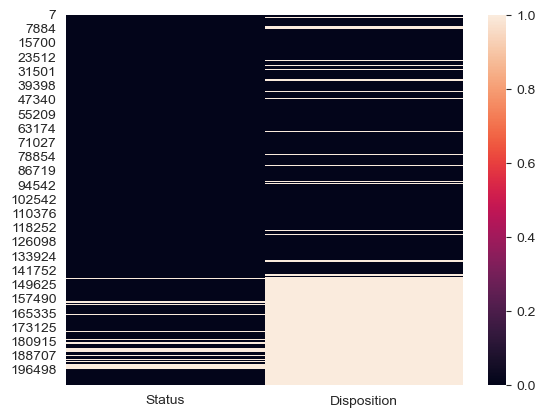

In [137]:
sns.heatmap(df[['Status','Disposition']].isnull())

In [138]:
# Mengisi nilai kosong dengan nilai modus
df['Airport Code'].fillna(df['Airport Code'].mode()[0], inplace=True)
df['Airport Name'].fillna(df['Airport Name'].mode()[0], inplace=True)
df['Airline Name'].fillna(df['Airline Name'].mode()[0], inplace=True)
df['Claim Type'].fillna(df['Claim Type'].mode()[0], inplace=True)
df['Claim Site'].fillna(df['Claim Site'].mode()[0], inplace=True)
df['Item'].fillna(df['Item'].mode()[0], inplace=True)

In [139]:
print('Modus pada Status : ',df['Status'].mode()[0])
print('Modus pada Disposition : ',df['Disposition'].mode()[0])

Modus pada Status :  Denied
Modus pada Disposition :  Deny


Untuk Status dan Disposition, kita tidak akan mengisinya dengan modus. Karena berdasarkan map di atas, data untuk Disposition banyak sekali yang kosong. Dataset sudah terurut berdasarkan tanggal insiden dan juga tanggal klaim. Jadi jika kita mengisi nilai-nilai yang kosong tersebut dengan Deny, kita tidak akan bisa mendapatkan data Close Amount untuk tahun-tahun akhir misal 2010 hingga 2015, karena data Close Amount yang akan kita analisa hanyalah yang berstatus Dispositionnya approved atau settled.

Oleh karena itu, kita akan mengisi nilai-nilai kosong tersebut dengan status lain yakni 'Unknown'. Status 'Unknown' akan kita masukkan ke dalam analisa Claim dan Close Amount, walaupun kita tidak tahu persis status disposisi yang sebenarnya apakah itu approved, denied, atau yang lainnya. Tapi ini merupakan pilihan yang lebih baik daripada kita mengisi dengan nilai modus.

In [140]:
df['Status'].fillna('Unknown', inplace=True)
df['Disposition'].fillna('Unknown', inplace=True)

##### 4. Claim Amount dan Close Amount.

Pengisian nilai kosong untuk kolom Claim Amount dan Close Amount, cara yang paling cepat dan memungkinkan adalah mengisi dengan nilai rata-rata/median. 

<AxesSubplot: >

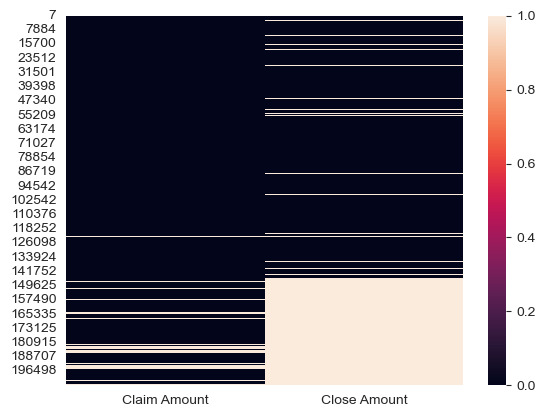

In [141]:
sns.heatmap(df[['Claim Amount','Close Amount']].isnull())

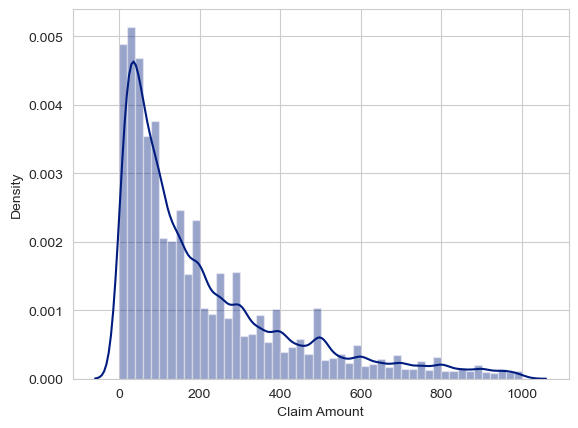

In [142]:
sns.distplot(df['Claim Amount'][(df['Claim Amount']>0)&(df['Claim Amount']<1000)])
plt.show()

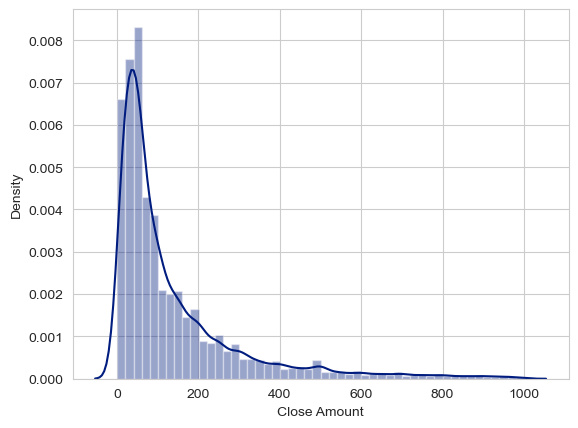

In [143]:
sns.distplot(df['Close Amount'][(df['Close Amount']>0)&(df['Close Amount']<1000)])
plt.show()

Dengan range sample 0 sampai 1000 dollar, terlihat distribusi data pada Claim Amount dan Close Amount adalah positive skewed / tidak terdistribusi normal. Oleh karena itu, kita akan mengisi nilai kosong dengan median.

https://www.kaggle.com/code/pagenotfound/mean-and-median-imputation/notebook

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#Impute_Replace_Missing_Values_with_Mean

In [144]:
df['Claim Amount'].fillna(df['Claim Amount'].median(), inplace=True)
#df['Close Amount'].fillna(df['Close Amount'].median(), inplace=True)

In [145]:
df['Close Amount'].mode()

0    0.0
Name: Close Amount, dtype: float64

Untuk Close Amount, kita tidak akan mengisinya dengan nilai median karena nilai mediannya 0. Jika kita lihat map untuk close amount, gambarannya mirip dengan disposition dan jika kita isi dengan 0 diperkirakan nilai colse amount untuk tahun 2010 sampai 2015 adalah 0. Hal ini tidak kita inginkan karena analisa untuk close amount tidak akan akurat. 

Kita juga tidak akan mengisi rata-rata karena kita sudah memiliki bukti bahwa data tidak terdistribusi normal. Oleh karena itu, kita akan coba menggunakan imputasi dengan model regresi. 

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Filter data Close Amount yang kosong 
mask = (df['Close Amount'].isnull())
df_missing = df[mask]

# Filter data Close Amount yang tidak kosong 
mask = (~df['Close Amount'].isnull())
df_not_missing = df[mask]

X_train, X_test, y_train, y_test = train_test_split(
    df_not_missing[['Claim Amount']], 
    df_not_missing['Close Amount'], 
    test_size=0.2, 
    random_state=42
)

reg = LinearRegression().fit(X_train, y_train)

# Predict nilai untuk Claim AMount yang kosong
y_pred = reg.predict(df_missing[['Claim Amount']])

# Isi dengan nilai yang sudah diprediksi
df.loc[df_missing.index, 'Close Amount'] = y_pred

In [147]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00000,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,97.74904,Unknown
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,American Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,97.74904,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.00000,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,97.74904,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,LAX,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,115.00,Unknown,97.74904,Unknown
204263,2015123027969,2015-12-17,2015-12-02,LAX,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Audio/Video; Home Decor,115.00,Unknown,97.74904,Unknown
204264,2016010428072,2015-12-22,2015-12-20,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,97.74904,Unknown
204265,2016011328300,2015-12-30,2015-12-28,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,97.74904,Unknown


### E. Outliers

In [148]:
# Menghitung IQR pada kolom Claim Amount
Claim_Q1 = df['Claim Amount'].quantile(0.25)
Claim_Q3 = df['Claim Amount'].quantile(0.75)
Close_Q1 = df['Close Amount'].quantile(0.25)
Close_Q3 = df['Close Amount'].quantile(0.75)

Claim_IQR = Claim_Q3 - Claim_Q1
Close_IQR = Close_Q3 - Close_Q1

# Menentukan batas atas dan batas bawah
Claim_upper_bound = Claim_Q3 + 1.5*Claim_IQR
Claim_lower_bound = Claim_Q1 - 1.5*Claim_IQR

Close_upper_bound = Close_Q3 + 1.5*Close_IQR
Close_lower_bound = Close_Q1 - 1.5*Close_IQR

print('Batas atas Claim: ', Claim_upper_bound)
print('Batas bawah Claim: ', Claim_lower_bound)
print('Batas atas Close: ', Close_upper_bound)
print('Batas bawah Close: ', Close_lower_bound)

Batas atas Claim:  721.79
Batas bawah Claim:  -381.73
Batas atas Close:  244.37260049939837
Batas bawah Close:  -146.62356029963902


In [149]:
# Menghitung jumlah outliers pada kolom Claim Amount
claim_outliers = df[(df['Claim Amount'] > Claim_upper_bound) | (df['Claim Amount'] < Claim_lower_bound)]
close_outliers = df[(df['Close Amount'] > Close_upper_bound) | (df['Close Amount'] < Close_lower_bound)]
print('Jumlah outliers pada kolom Claim Amount: ', len(claim_outliers))
print('Jumlah outliers pada kolom Close Amount: ', len(close_outliers))

Jumlah outliers pada kolom Claim Amount:  24527
Jumlah outliers pada kolom Close Amount:  12073


In [150]:
df.describe()

,Claim Amount,Close Amount
count,2.025190e+05,202519.000000
mean,1.490044e+07,98.221638
std,6.666378e+09,756.413836
min,0.000000e+00,0.000000
25%,3.209000e+01,0.000000
50%,1.150000e+02,75.000000
75%,3.079700e+02,97.749040
max,3.000000e+12,250000.000000


In [151]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
7,12772,2002-06-20,2002-05-09,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.00,Approved,75.00000,Approve in Full
8,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,97.74904,Unknown
9,2004102965797,2002-06-25,2002-05-04,ATL,Hartsfield-Jackson Atlanta International Airport,American Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,4457.29,Denied,97.74904,Deny
12,14460,2002-07-08,2002-06-12,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.71,Approved,17.00000,Approve in Full
13,13334,2002-07-08,2002-06-04,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.00,Canceled,97.74904,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,LAX,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,115.00,Unknown,97.74904,Unknown
204263,2015123027969,2015-12-17,2015-12-02,LAX,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Audio/Video; Home Decor,115.00,Unknown,97.74904,Unknown
204264,2016010428072,2015-12-22,2015-12-20,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.00,Unknown,97.74904,Unknown
204265,2016011328300,2015-12-30,2015-12-28,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.00,Unknown,97.74904,Unknown


In [152]:
df[df['Claim Amount'] == df['Claim Amount'].max()]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
118207,2008012238289,2008-02-12,2007-12-28,JFK,John F. Kennedy International,American Airlines,Personal Injury,Checkpoint,Other,3.000000e+12,Denied,0.0,Deny


In [153]:
df.sort_values('Claim Amount', ascending = False).head(10)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
118207,2008012238289,2008-02-12,2007-12-28,JFK,John F. Kennedy International,American Airlines,Personal Injury,Checkpoint,Other,3.000000e+12,Denied,0.000000,Deny
82901,2006032803795,2006-03-27,2004-06-01,PHX,Phoenix Sky Harbor International,American Airlines,Personal Injury,Other,Other,5.000000e+09,In litigation,97.585609,Deny
35811,2004052653605,2004-05-26,2002-09-05,LAX,John F. Kennedy International,American Airlines,Personal Injury,Other,Other,5.000000e+09,Canceled,0.000000,Unknown
49122,2004110866757,2004-11-04,2004-11-04,C,Civil Aviation; Non TSA manned Airport,Civil Aviation - Non-Commercial Carrier,Passenger Property Loss,Other,Other,2.500000e+09,Denied,0.000000,Deny
50567,2004121669173,2004-11-23,2004-05-23,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Other,Other,2.500000e+09,Denied,0.000000,Deny
129263,2008102251419,2008-10-08,2008-10-08,LAX,John F. Kennedy International,American Airlines,Personal Injury,Checked Baggage,Other,1.000000e+09,Insufficient; one of the following items requi...,97.716354,Unknown
124832,2008063046385,2008-06-30,2007-04-25,OAK,Metropolitan Oakland International,American Airlines,Personal Injury,Checkpoint,Other,1.000000e+09,Denied,0.000000,Deny
69190,2005080990257,2005-08-01,2005-06-13,PHX,Phoenix Sky Harbor International,Sun Country Airlines Inc,Personal Injury,Checkpoint,Medicines,1.250000e+08,Denied,0.000000,Deny
86400,2006060907675,2006-06-06,2006-04-19,LAX,Los Angeles International Airport,America West,Personal Injury,Checked Baggage,Currency; Locks; Other,1.000000e+08,Denied,0.000000,Deny
48857,2004122069372,2004-11-02,2004-09-23,OKC,Will Rogers World,American Airlines,Personal Injury,Checkpoint,Other,2.722500e+07,Denied,0.000000,Deny


In [154]:
df.sort_values('Close Amount', ascending = False).head(10)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
2703,0221037L,2003-02-21,2003-01-08,LAS,McCarran International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,250000.0,Denied,250000.0,Deny
60135,2007042424434,2005-03-25,2004-06-16,TSA,TSA - Non-Specified Airport,American Airlines,Personal Injury,Motor Vehicle,Other,500000.0,Settled,125000.0,Settle
20659,1117800M,2003-11-17,2003-08-24,HOU,William P. Hobby,American Airlines,Personal Injury,Checkpoint,Other,495000.0,Settled,106000.0,Settle
33021,2004072359942,2004-04-21,2004-02-10,LAX,John F. Kennedy International,USAir,Passenger Property Loss,Checkpoint,Jewelry - Fine,77000.0,Canceled,77000.0,Unknown
36935,2004070758620,2004-06-03,2004-04-02,F,Foreign airport,Northwest Airlines,Passenger Property Loss,Other,Other,45178.0,Denied,45178.0,Deny
79171,2006012600385,2006-01-19,2005-11-07,BMI,Bloomington-Normal Airport,UAL,Personal Injury,Checkpoint,Other,60000.0,Settled,25000.0,Settle
40189,2004080560658,2004-07-13,2002-08-05,JFK,John F. Kennedy International,American Airlines,Personal Injury,Checkpoint,Other,2000000.0,Settled,25000.0,Settle
43892,2004100664656,2004-09-01,2004-08-25,DEN,Denver International Airport,UAL,Passenger Property Loss,Checked Baggage,Jewelry - Fine,22000.0,Canceled,22000.0,Unknown
50725,2004091562925,2004-11-24,2003-12-27,HPN,Westchester County; White Plains,USAir,Personal Injury,Checkpoint,Clothing - Shoes; belts; accessories; etc.,50150.0,Settled,20000.0,Settle
143575,2009112365630,2009-11-12,2007-12-20,MSY,New Orleans International,American Airlines,Personal Injury,Motor Vehicle,Other,125719.0,Settled,20000.0,Settle


Pada kasus ini kita bisa saja menghapus outliers, tetapi seperti yang kita lihat jumlah outliers sangat banyak sehingga jika kita hapus, akan mengurangi informasi yang bisa kita dapat. Oleh karena itu kita akan menggunakan transformasi log.

Jika kita mengacu pada poin D.4 di markdown. Kita sudah melihat distribusi dari Claim Amount dan Close Amount memiliki distribusi right skewed. Jika data adalah right skewed, maka sebaiknya menggunakan transformasi log. Hal ini dikarenakan transformasi log memiliki efek yang lebih baik pada data yang condong ke kanan atau right skewed. Dengan menggunakan transformasi log, nilai-nilai ekstrim pada data right skewed dapat diurangi, sehingga distribusi data menjadi lebih simetris dan dapat diinterpretasikan dengan lebih mudah.

https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution<br>
https://towardsdatascience.com/types-of-transformations-for-better-normal-distribution-61c22668d3b9

In [155]:
#Transformasi outliers dengan log
df.loc[df['Claim Amount'] > Claim_upper_bound, 'Claim Amount'] = np.log(df['Claim Amount'])
df.loc[df['Claim Amount'] < Claim_lower_bound, 'Claim Amount'] = np.log(df['Claim Amount'])

df.loc[df['Close Amount'] > Close_upper_bound, 'Close Amount'] = np.log(df['Close Amount'])
df.loc[df['Close Amount'] < Close_lower_bound, 'Close Amount'] = np.log(df['Close Amount'])

Kita lihat contoh data yang sudah ditransformasi.
* 2008012238289 untuk nilai sebelum transformasi Claim Amount -> 3.000000e+12
* 0221037L dan 2007042424434 untuk nilai sebelum transformasi Close Amount -> 250000 dan 150000

In [156]:
df[df['Claim Number'].isin(['2008012238289','0221037L','2007042424434'])]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
2703,0221037L,2003-02-21,2003-01-08,LAS,McCarran International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Other,12.429216,Denied,12.429216,Deny
60135,2007042424434,2005-03-25,2004-06-16,TSA,TSA - Non-Specified Airport,American Airlines,Personal Injury,Motor Vehicle,Other,13.122363,Settled,11.736069,Settle
118207,2008012238289,2008-02-12,2007-12-28,JFK,John F. Kennedy International,American Airlines,Personal Injury,Checkpoint,Other,28.729633,Denied,0.000000,Deny


In [157]:
# Menghitung kembali jumlah outliers pada kolom Claim Amount
claim_outliers = df[(df['Claim Amount'] > Claim_upper_bound) | (df['Claim Amount'] < Claim_lower_bound)]
close_outliers = df[(df['Close Amount'] > Close_upper_bound) | (df['Close Amount'] < Close_lower_bound)]
print('Jumlah outliers pada kolom Claim Amount: ', len(claim_outliers))
print('Jumlah outliers pada kolom Close Amount: ', len(close_outliers))

Jumlah outliers pada kolom Claim Amount:  0
Jumlah outliers pada kolom Close Amount:  0


In [158]:
df.describe()

,Claim Amount,Close Amount
count,202519.000000,202519.000000
mean,128.615097,52.816430
std,156.127368,53.027796
min,0.000000,0.000000
25%,8.021420,0.000000
50%,77.000000,45.000000
75%,178.000000,97.749040
max,721.540000,244.370000


Kita perhatikan deskripsi data sebelum transformasi outliers. nilai mean dan standard deviasi sangat tidak wajar, hal ini karena pada dataset ini memiliki nilai yang sangat ekstrim. 

Contoh bisa kita lihat, nilai maksimum dari Claim Amount saja $3.000.000.000.000 atau tiga triliun dollar. Begitu juga dengan nilai maksimum dari Close Amount bernilai 250.000 dollar. Ini sangat tidak mungkin, belum lagi jika terdapat data dengan nilai di bawah nilai-nilai tersebut yang mungkin berdekatan. 

Oleh karena itu transformasi outliers sangat diperlukan dengan alasan :

1. Outlier dapat mempengaruhi hasil analisis dan statistik pada dataset, seperti rata-rata (mean) dan standar deviasi. Oleh karena itu, penghapusan outlier dapat memperbaiki statistik dan mencegah kesalahan interpretasi hasil analisis.

2. Outlier dapat berasal dari kesalahan pengukuran atau perekaman data. Dalam hal ini, transformasi outlier akan meningkatkan kualitas dataset dengan mengurangi kesalahan dan noise.

### F. Format Data

Pada tahap ini kita akan menyeragamkan format data pada setiap kolom. Tujuan penyeragaman format data pada setiap kolom di dataset TSA Claims adalah untuk memastikan konsistensi dalam pengolahan dan analisis data. Dalam dataset TSA Claims, terdapat banyak kolom yang berisi informasi yang sangat beragam, seperti tipe barang yang hilang atau rusak, lokasi kejadian, jenis klaim yang diajukan, dan sebagainya.

Jika format data tidak diseragamkan, maka data yang dimasukkan ke dalam kolom tersebut dapat berbeda-beda dan sulit untuk diolah. Contoh pada kolom 'status' di dataset TSA Claims, kita bisa mempertimbangkan kolom 'status klaim'. Kolom ini mengindikasikan apakah klaim yang diajukan telah diselesaikan, ditolak, atau masih dalam proses.

Tanpa penyeragaman format data, informasi pada kolom 'status klaim' mungkin akan ditulis dengan berbagai variasi, seperti 'Selesai', 'selesai', 'Selesaikan', 'SELESAI', 'Ditolak', 'ditolak', 'Tolak', dan sebagainya. Oleh karena itu, untuk memastikan bahwa data di dalam kolom tersebut konsisten dan mudah diproses, diperlukan penyeragaman format data.

Sebenarnya tahap ini sudah pernah dilakukan sebelumnya pada kolom 'Date Received' dan 'Incident Date' pada tahap A. Kali ini kita akan melakukannya kembali untuk kolom-kolom lainnya.

In [159]:
unique_items = df['Status'].unique()
print(unique_items)

['Approved' 'Canceled' 'Denied'
 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.'
 'Settled' 'In litigation' 'Closed as a contractor claim' 'In review'
 'Claim entered' 'Claim has been assigned for further investigation'
 'Pending response from claimant' 'Deny' 'Unknown' 'Settle'
 'Approve in Full']


In [160]:
unique_items = df['Disposition'].unique()
print(unique_items)

['Approve in Full' 'Unknown' 'Deny' 'Settle']


In [161]:
df['Status'] = df['Status'].replace('Approve in Full', 'Approved')
df['Disposition'] = df['Disposition'].replace('Approve in Full', 'Approved')

df['Status'] = df['Status'].replace('Deny', 'Denied')
df['Disposition'] = df['Disposition'].replace('Deny', 'Denied')

df['Status'] = df['Status'].replace('Settle', 'Settled')
df['Disposition'] = df['Disposition'].replace('Settle', 'Settled')

df['Status'] = df['Status'].replace(('Canceled','In review','Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.','Closed as a contractor claim','In litigation','Pending response from claimant','Claim has been assigned for further investigation'), 'Other')

In [162]:
unique_items = df['Status'].unique()
print(unique_items)

['Approved' 'Other' 'Denied' 'Settled' 'Claim entered' 'Unknown']


Lalu kita akan menghilankan whitespace pada data.

In [163]:
cols_to_strip  = ['Claim Number', 'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Status', 'Disposition']
for col in cols_to_strip:
    df[col] = df[col].str.strip()

## Penambahan dan Pengurangan Features

Pada tahap ini kita akan membuang fitur Airport Code. Fitur ini tidak kita butuhkan dan tidak akan kita gunakan untuk analisa, jadi akan kita hapus.

Pada tahap ini juga akan dilakukan penambahan kolom yakni 'Day Differences' sebagai selisih waktu antara tanggal insiden dan tanggal klaim diajukan dan 'Amount Differences' sebagai selisih antara jumlah yang diajukan dalam klaim dan jumlah yang dibayarkan oleh TSA. Penambahan ini bertujuan untuk memperkaya analisa.

In [164]:
df.drop(['Airport Code'], axis = 1, inplace = True)

In [165]:
# Hitung selisih waktu antara Incident Date dan Date Received diajukan
df['Day Differences'] = (df['Date Received'] - df['Incident Date']).dt.days

# Hitung selisih antara Claim Amount dan Close Amount.
df['Amount Differences'] = 0
conditions = [(df['Status'].isin(['Approved', 'Settled', 'Unknown'])) & (df['Disposition'].isin(['Approved', 'Settled', 'Unknown']))]
values = [df['Claim Amount'] - df['Close Amount']]
df['Amount Differences'] = np.select(conditions, values, df['Amount Differences'])

In [166]:
df

,Claim Number,Date Received,Incident Date,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
7,12772,2002-06-20,2002-05-09,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,75.000000,Approved,75.00000,Approved,42,0.00000
8,14268,2002-06-20,2002-06-16,Phoenix Sky Harbor International,American Airlines,Property Damage,Checkpoint,Computer - Laptop,7.727575,Other,97.74904,Unknown,4,0.00000
9,2004102965797,2002-06-25,2002-05-04,Hartsfield-Jackson Atlanta International Airport,American Airlines,Passenger Property Loss,Checkpoint,Jewelry - Fine,8.402296,Denied,97.74904,Denied,52,0.00000
12,14460,2002-07-08,2002-06-12,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Passenger Property Loss,Checkpoint,Eyeglasses - (including contact lenses),16.710000,Approved,17.00000,Approved,26,-0.29000
13,13334,2002-07-08,2002-06-04,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Other,Clothing - Shoes; belts; accessories; etc.,450.000000,Other,97.74904,Unknown,34,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,115.000000,Unknown,97.74904,Unknown,35,17.25096
204263,2015123027969,2015-12-17,2015-12-02,John F. Kennedy International,American Airlines,Property Damage,Checked Baggage,Audio/Video; Home Decor,115.000000,Unknown,97.74904,Unknown,15,17.25096
204264,2016010428072,2015-12-22,2015-12-20,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Clothing,115.000000,Unknown,97.74904,Unknown,2,17.25096
204265,2016011328300,2015-12-30,2015-12-28,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,115.000000,Unknown,97.74904,Unknown,2,17.25096


Lalu kita coba deskripsikan kembali datasetnya.

In [167]:
df.describe()

,Claim Amount,Close Amount,Day Differences,Amount Differences
count,202519.000000,202519.000000,202519.000000,202519.000000
mean,128.615097,52.816430,42.530365,28.704087
std,156.127368,53.027796,101.744313,99.242780
min,0.000000,0.000000,0.000000,-237.731432
25%,8.021420,0.000000,12.000000,0.000000
50%,77.000000,45.000000,23.000000,0.000000
75%,178.000000,97.749040,44.000000,0.693147
max,721.540000,244.370000,18279.000000,715.112508


In [168]:
df[df['Day Differences'] == 18279]

,Claim Number,Date Received,Incident Date,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
96944,2005051985108,2055-05-17,2005-04-30,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Other,96.58,Denied,0.0,Denied,18279,0.0


Setelah penambahan fitur baru, kita menemukan terdapat nilai yang sangat ekstrim pada kolom Day Differences. Contoh terdapat nilai maksimum 18279 hari atau sama dengan kurang lebih 50 tahun. Ini tentu saja tidak mungkin. Nilai-nilai seperti ini akan mengganggu analisa kedepan ketika kita akan menghitung rata-rata Day Differences yang akan menyebabkan ketidakakuratan nilai rata-rata. 

Pada kasus ini, kita tidak akan menggunakan transofrmasi pada Day Differences, karena nilai ini diambil dari hasil pengurangan hari antara tanggal klaim dan tanggal insiden. Artinya nilai ekstrim dihasilkan dari nilai tanggal klaim yang tidak normal yang bisa kita lihat tanggal klaimnya yakni 17 May 2055.

Oleh karena itu, data/observasi dengan outlier seperti ini akan kita hapus saja.

In [169]:
daydiff_Q1 = df['Day Differences'].quantile(0.25)
daydiff_Q3 = df['Day Differences'].quantile(0.75)

daydiff_IQR = daydiff_Q3 - daydiff_Q1

# Menentukan batas atas dan batas bawah
daydiff_upper_bound = daydiff_Q3 + 1.5*daydiff_IQR
daydiff_lower_bound = daydiff_Q1 - 1.5*daydiff_IQR

print('Batas atas Day Differences: ', daydiff_upper_bound)
print('Batas bawah Day Differences: ', daydiff_lower_bound)

Batas atas Day Differences:  92.0
Batas bawah Day Differences:  -36.0


In [170]:
daydiff_outliers = df[(df['Day Differences'] > daydiff_upper_bound) | (df['Day Differences'] < daydiff_lower_bound)]
print('Jumlah outliers pada kolom Day Differences: ', len(daydiff_outliers))

Jumlah outliers pada kolom Day Differences:  17923


In [171]:
df = df[(df['Day Differences'] >= daydiff_lower_bound) & (df['Day Differences'] <= daydiff_upper_bound)]

In [172]:
daydiff_outliers = df[(df['Day Differences'] > daydiff_upper_bound) | (df['Day Differences'] < daydiff_lower_bound)]
print('Jumlah outliers pada kolom Day Differences: ', len(daydiff_outliers))

Jumlah outliers pada kolom Day Differences:  0


In [173]:
df.describe()

,Claim Amount,Close Amount,Day Differences,Amount Differences
count,184596.000000,184596.000000,184596.000000,184596.000000
mean,128.072305,53.144164,26.269648,28.404556
std,155.482901,52.953672,20.330888,98.592543
min,0.000000,0.000000,0.000000,-237.731432
25%,8.039157,0.000000,11.000000,0.000000
50%,76.110000,46.905000,21.000000,0.000000
75%,175.000000,97.749040,36.000000,0.693147
max,721.540000,244.370000,92.000000,715.112508


In [174]:
# Simpan dataset yang telah dibersihkan dan diupdate ke dalam file baru untuk keperluan visualisasi di tableau
#df.to_csv('TSA_Claims_v1.csv', index=False)
#df.to_excel('TSA_Claims_v1.xlsx', index=False)

# Data Analysis

Untuk menjawab pernyataan masalah 'Bagaimana agar tingkat claim bisa diminimalisir dengan mencegah insiden, sehingga juga dapat mengurangi kerugian baik yang dialami penumpang, maskapai, dan TSA?', analisis yang akan kita lakukan adalah sebagai berikut :

1. Analisis Tren Insiden<br>
   Dilakukan untuk mengetahui apakah jumlah insiden mengalami peningkatan atau penurunan dari waktu ke waktu. Jika terdapat tren peningkatan, maka dapat dilakukan evaluasi terhadap kebijakan dan praktik keamanan di bandara untuk memastikan efektivitas dan efisiensinya dalam mencegah insiden dan mengurangi kerugian. Pada tahap ini, kita akan melihat secara umum jumlah biaya yang diajukan untuk ganti rugi claim dan jumlah pembayaran yang dibuat oleh TSA sebagai ganti rugi dari waktu ke waktu.

2. Analisis Faktor Risiko<br>
   Dilakukan untuk mengidentifikasi faktor-faktor yang berkaitan dengan insiden dalam dataset TSA Claims. Analisis ini bertujuan untuk mengidentifikasi pola dan tren insiden yang berkaitan dengan faktor-faktor tersebut, sehingga dapat diambil tindakan pencegahan yang lebih efektif untuk mencegah insiden di masa depan.
   

In [175]:
df['Incident Date'].min()

Timestamp('2002-05-02 00:00:00')

In [176]:
df['Incident Date'].max()

Timestamp('2015-12-29 00:00:00')

### Analisis Tren Insiden

Pertama-tama mari kita lihat :
1. Jumlah insiden per tahun. Ini bertujuan untuk melihat tren insiden selama rentang waktu 2002 - 2015.
2. Kapan insiden sering terjadi ?. Apakah ada waktu-waktu tertentu di mana insiden sering terjadi ?.
3. Keseluruhan total claim amount per tahun di mana statusnya approved dan Keseluruhan total close amount per tahun di mana disposisinya approved atau settled.

#### 1. Jumlah kasus per tahun.

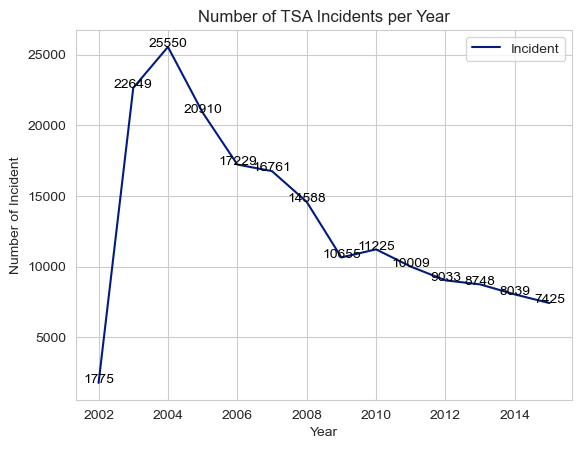

In [177]:
incident_per_year = df.groupby(df['Incident Date'].dt.year)['Claim Number'].count().reset_index(name='Count')

sns.set_style('whitegrid')
sns.lineplot(data=incident_per_year, x='Incident Date', y='Count', label='Incident')
 
for index, row in incident_per_year.iterrows():
    plt.text(row['Incident Date'], row['Count'], row['Count'], color='black', ha='center')

plt.title('Number of TSA Incidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incident')
plt.show()

Informasi yang bisa didapat :

- Dapat kita lihat bahwa tren insiden mengalami kenaikan drastis dari tahun 2002 ke 2003. Ini kemungkinan kita tidak memiliki cukup data pada tahun 2002 dan karena TSA baru dibentuk akhir 2001.
- Dari tahun 2003 hingga 2010 cenderung fluktuatif namun yang ingin kita hightlight adalah fluktuasi dari tahun 2008 - 2010. Penurunan jumlah insiden dari tahun 2008 ke 2009 diakibatkan oleh penurunan jumlah penerbangan yang disebabkan oleh krisis ekonomi global dan pandemi H1N1/flu babi yang terjadi pada tahun 2009. Ini tentu saja sangat berdampak pada industri aviasi di Amerika. Jika tidak terdapat krisis ekonomi global dan pandemi H1N1, bisa saja pada tahun 2009 tren insiden tidak akan turun ke angka 7804. Artinya penurunan ini disebabkan oleh faktor lain dan bukan dari adanya peningkatan kualitas pelayanan di bandara.

https://corporatefinanceinstitute.com/resources/economics/2008-2009-global-financial-crisis/#:~:text=Summary,that%20bundled%20high%2Drisk%20loans<br>
https://en.wikipedia.org/wiki/Global_financial_crisis_in_2009<br>
https://en.wikipedia.org/wiki/2009_swine_flu_pandemic_in_the_United_States#:~:text=From%20April%2012%2C%202009%2C%20to,States%20due%20to%20the%20virus<br>
https://www.cdc.gov/flu/pandemic-resources/2009-h1n1-pandemic.html

- Kemudian pada tahun 2010 tren insiden kembali mengalami kenaikan kembali, jumlah penerbangan kembali meningkat karena adanya pemulihan ekonomi global yang membuat orang-orang kembali melakukan perjalanan udara.
- Sisanya, dari tahun 2010 - 2015 cenderung mengalami penurunan. Berdasarkan data yang diperoleh dari https://www.statista.com/statistics/197689/us-airline-fuel-cost-since-2004/, terdapat kenaikan harga avtur/bahan bakar pesawat pada tahun 2010 hingga 2012 dan kembali menurun dari tahun 2013 sampai 2015 walaupun masih tergolong tinggi. Faktor ini dapat menyebabkan kenaikan harga tiket dan dapat mengurangi jumlah perjalanan udara. Hanya saja, pernyataan tadi belum tentu benar, kita perlu melakukan analisa yang lebih dalam. Tapi kita tidak akan melakukannya, sampai titik ini kita hanya akan menganggap faktor tadi mungkin menjadi salah satu penyebabnya.
- Atau bisa saja pada rentang waktu tersebut, TSA sudah melakukan evaluasi untuk meningkatkan pelayanan terhadap barang-barang penumpang, sehingga jumlah insiden menurun.

#### 2. Kapan insiden sering terjadi ?. Apakah ada waktu-waktu tertentu di mana insiden sering terjadi ?.

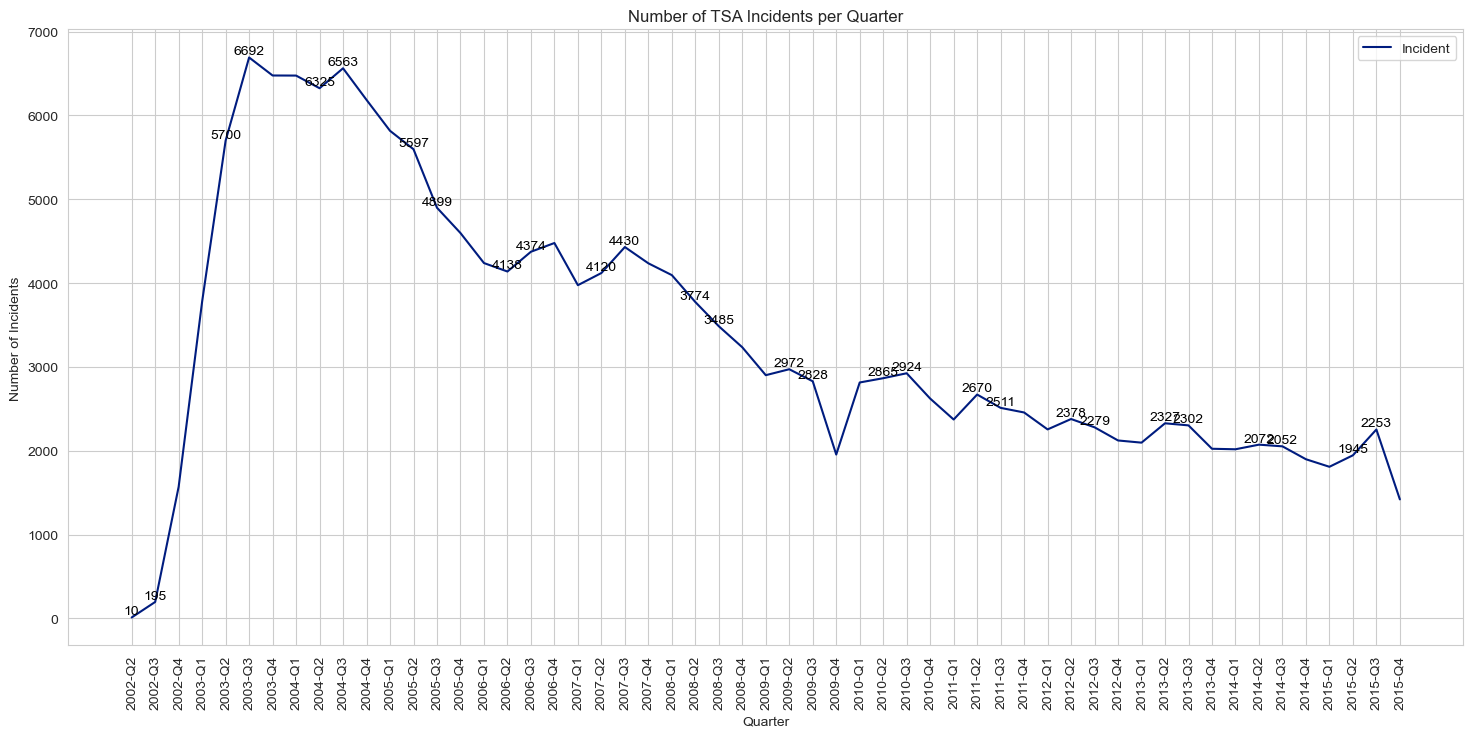

In [178]:
df_quarter_incident = df['Incident Date'].dt.year.astype(str) + '-Q' + df['Incident Date'].dt.quarter.astype(str)

incident_per_quarter = df.groupby(df_quarter_incident)['Claim Number'].count().reset_index(name='Count')

plt.figure(figsize=(18, 8))
sns.set_style('whitegrid')
sns.lineplot(data=incident_per_quarter, x='Incident Date', y='Count', label='Incident')

plt.title('Number of TSA Incidents per Quarter')
plt.xticks(rotation=90)
plt.xlabel('Quarter')
plt.ylabel('Number of Incidents')

for i, quarter in enumerate(incident_per_quarter['Incident Date']):
    if quarter.endswith('-Q2') or quarter.endswith('-Q3'):
        plt.text(i, incident_per_quarter['Count'].iloc[i], incident_per_quarter['Count'].iloc[i],
                 ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [179]:
total_incidents_per_quarter = incident_per_quarter.groupby(incident_per_quarter['Incident Date'].str[-2:])['Count'].sum().reset_index(name='Count')

print(total_incidents_per_quarter)

  Incident Date  Count
0            Q1  44644
1            Q2  46893
2            Q3  47787
3            Q4  45272


Terlihat pada grafik, insiden sering mengalami peningkatan dan menempati puncak antara kuartal 2 dan kuartal 3. Mari kita coba perhatikan lebih detilnya dengan melihat jumlah kasus per bulan.

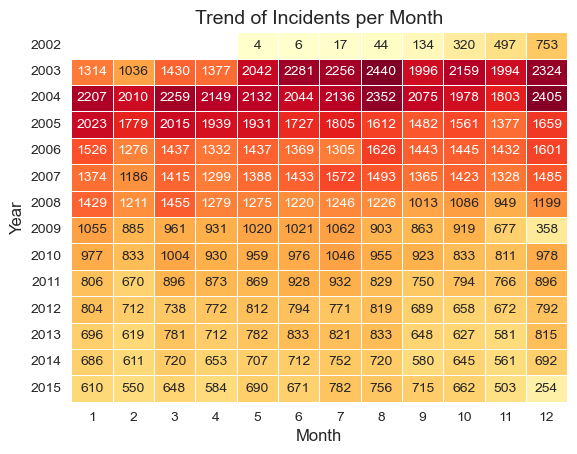

In [180]:
year = df['Incident Date'].dt.year
month = df['Incident Date'].dt.month
pt = df.groupby([year, month])['Claim Number'].count().unstack()

sns.heatmap(pt, cmap='YlOrRd', annot=True, fmt='g', linewidths=.5, cbar=False)

plt.title('Trend of Incidents per Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.show()

Informasi yang didapat :
* Kasus tertinggi banyak terjadi pada rentang bulan Juni hingga bulan Agustus, di mana Juni merupakan akhir dari fase kuartal 2 dan Juli serta Agustus termasuk ke dalam fase kuartal 3. Di Amerika, bulan Juni hingga Agustus merupakan musim panas. Berarti kita bisa tahu peningkatan jumlah penumpang yang tertinggi terjadi selama musim panas. 
* Pada musim panas, banyak orang bepergian untuk liburan dan berkumpul dengan keluarga, sehingga meningkatkan jumlah penumpang di bandara. Dengan meningkatnya jumlah penumpang, kemungkinan juga mengingkatkan jumlah insiden yang terjadi di bandara.
* Selain itu, dari grafik tren insiden per bulan, kita juga bisa mengetahui terdapat kasus yang juga cukup tinggi di bulan Desember. Tentu saja ini berkaitan dengan liburan Natal dan Tahun Baru.

#### 3. Keseluruhan total claim amount per tahun di mana statusnya approved, settled, dan unknown dan Keseluruhan total close amount per tahun di mana disposisinya approved, settled, dan unknown.

Analisa tersebut dilakukan untuk melihat jumlah uang yang dikeluarkan oleh TSA setiap tahun untuk menyelesaikan klaim yang telah disetujui atau diselesaikan. Analisa ini dapat memberikan informasi tentang beban keuangan TSA yang diakibatkan oleh klaim, dan dapat membantu TSA dalam mengambil keputusan kebijakan dan anggaran di masa depan.

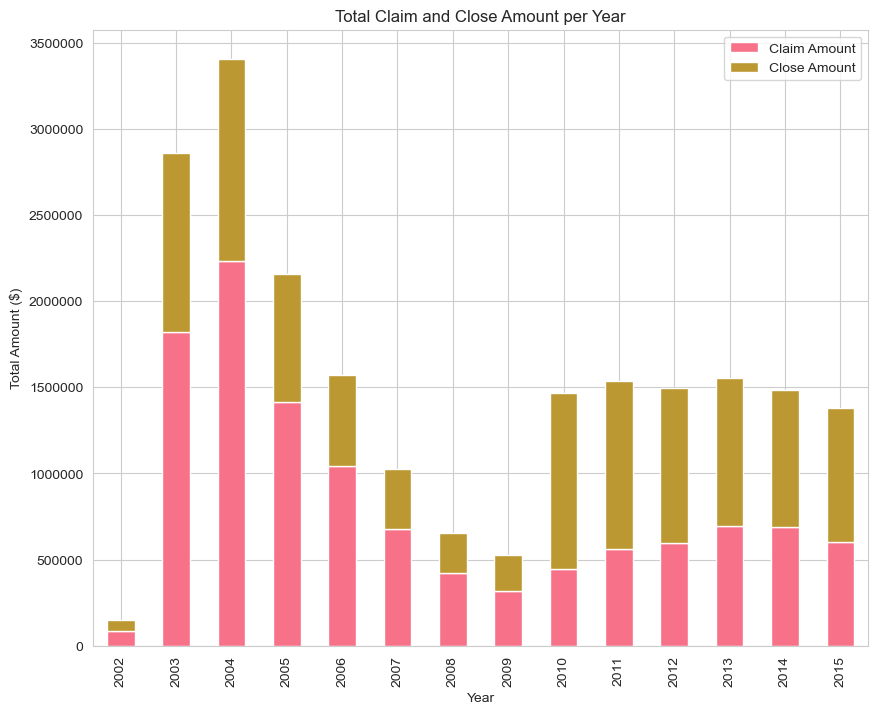

In [181]:
status_approved = df[df['Status'].isin(['Approved', 'Settled', 'Unknown'])]
status_approved_or_settled = df[df['Disposition'].isin(['Approved', 'Settled', 'Unknown'])]

claim_per_year = status_approved.groupby(status_approved['Date Received'].dt.year)['Claim Amount'].sum().reset_index()
close_per_year = status_approved_or_settled.groupby(status_approved_or_settled['Date Received'].dt.year)['Close Amount'].sum().reset_index()

df_total = pd.merge(claim_per_year, close_per_year, on='Date Received')

sns.set_style('whitegrid')
sns.set_palette('husl')
ax = df_total.plot(x='Date Received', kind='bar', stacked=True, figsize=(10,8))
ax.set_xlabel('Year')
ax.set_ylabel('Total Amount ($)')
ax.set_title('Total Claim and Close Amount per Year')
formatter = ticker.FormatStrFormatter('%0.0f')  #pada df_total, hasilnya berupa tanda e+, jadi pakai ticker
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


Informasi yang didapat :

* Bisa kita lihat pada stack bar chart, untuk tahun 2002 hingga 2009, proporsi total Claim Amount lebih besar dari pada total Close Amount, artinya kemungkinan jumlah yang dibayarkan oleh TSA masih lebih kecil daripada yang diklaim oleh penumpang.
* Lalu untuk tahun 2010 hingga 2015, proporsi total Claim Amount lebih kecil dari pada total Close Amount, artinya kemungkinan jumlah yang dibayarkan oleh TSA masih lebih besar daripada yang diklaim oleh penumpang.
* Pada tahun 2010 hingga 2015, total Close Amount cenderung menurun. Walaupun jumlah yang dibayarkan oleh TSA masih tinggi.

#### Amount Differences

Analisa ini bertujuan untuk melengkapi informasi yang didapat pada poin 3.

1. Berapa kemungkinan jumlah kerugian yang bisa diminimalisir TSA per tahun ( Amount Differences +) ?.
2. Berapa kemungkinan jumlah kerugian lebih yang harus dibayarkan TSA per tahun ( Amount Differences -) ?.

Sebagaimana yang kita ketahui, Amount Differences adalah hasil pengurangan Claim Amount dan Close Amount dengan catatan status Claim Amount dan disposisi Close Amount approved, settled, dan unknown. Sehingga:

* Untuk Amount Differences yang positif (+), berarti Claim Amount jumlahnya lebih besar daripada Close Amount. Artinya, jumlah pembayaran yang dibuat oleh TSA sebagai ganti rugi lebih kecil dari jumlah biaya yang diajukan penumpang untuk ganti rugi atau bisa diartikan kemungkinan jumlah kerugian yang bisa diminimalisir oleh TSA.
* Untuk Amount Differences yang negatif (-), berarti Close Amount jumlahnya lebih besar daripada Claim Amount. Artinya, jumlah pembayaran yang dibuat oleh TSA sebagai ganti rugi lebih besar dari jumlah biaya yang diajukan penumpang untuk ganti rugi atau bisa diartikan kemungkinan jumlah kerugian lebih yang harus dibayarkan oleh TSA.

Kita lihat kedua poin tersebut secara keseluruhan sebelum melihatnya berdasarkan tahun.

In [182]:
minimal_loss = df[df['Amount Differences'] > 0]['Amount Differences'].sum()
print('Total kemungkinan kerugian yang bisa diminimalisir TSA: $', minimal_loss)

excess_loss = df[df['Amount Differences'] < 0]['Amount Differences'].sum()
print('Total kemungkinan kerugian lebih yang harus dibayarkan TSA: $', abs(excess_loss))

Total kemungkinan kerugian yang bisa diminimalisir TSA: $ 5843344.72755356
Total kemungkinan kerugian lebih yang harus dibayarkan TSA: $ 599977.2424467282


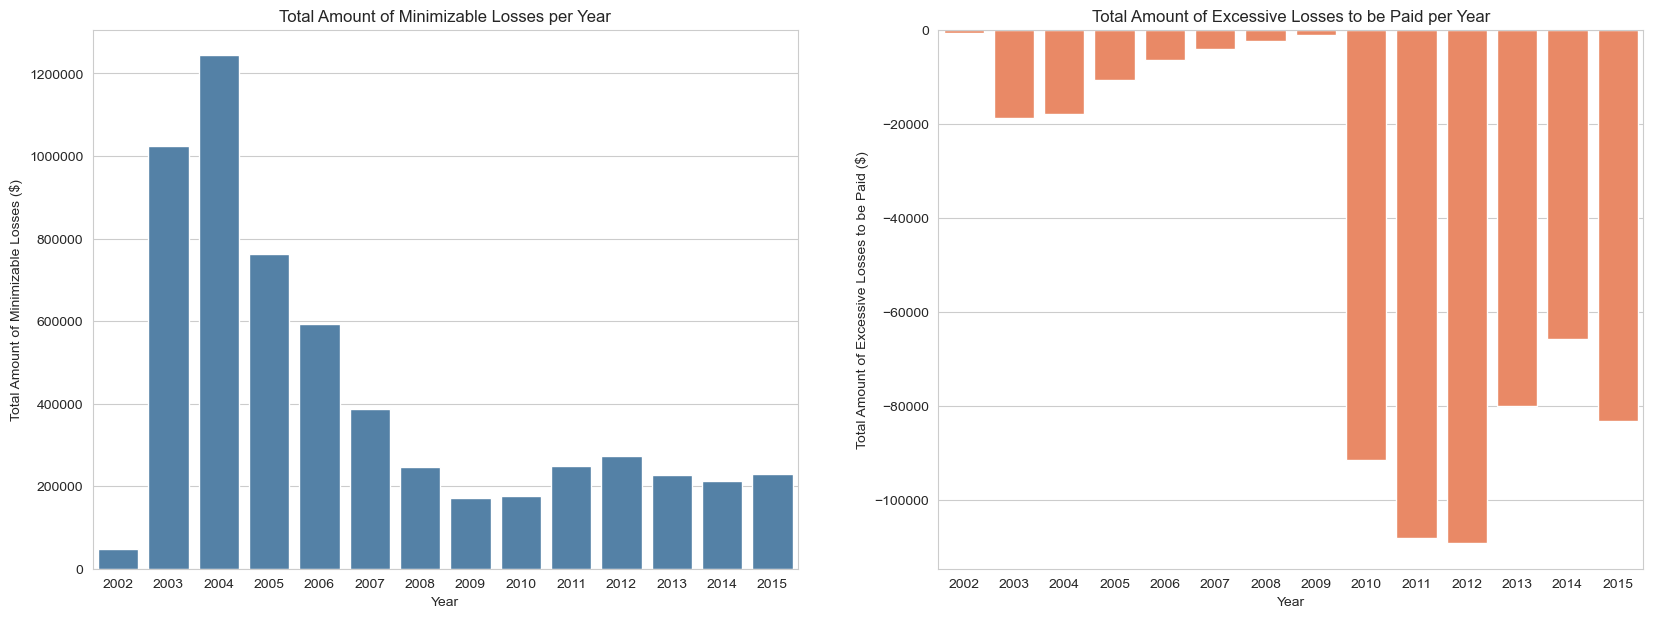

In [183]:
df['Year'] = df['Date Received'].dt.year
# Menghitung jumlah Amount Differences + per tahun
plus_losses = df[df['Amount Differences'] > 0].groupby('Year')['Amount Differences'].sum()
# Menghitung jumlah Amount Differences - per tahun
minus_losses = df[df['Amount Differences'] < 0].groupby('Year')['Amount Differences'].sum()

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.barplot(x=plus_losses.index, y=plus_losses.values, color='steelblue')
plt.title('Total Amount of Minimizable Losses per Year')
plt.xlabel('Year')
plt.ylabel('Total Amount of Minimizable Losses ($)')
formatter = ticker.FormatStrFormatter('%0.0f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.subplot(1, 2, 2)
sns.barplot(x=minus_losses.index, y=minus_losses.values, color='coral')
plt.title('Total Amount of Excessive Losses to be Paid per Year')
plt.xlabel('Year')
plt.ylabel('Total Amount of Excessive Losses to be Paid ($)')
plt.show()

Informasi yang didapat :
* Total kemungkinan kerugian yang bisa diminimalisir TSA secara keseluruhan yakni 5.843.344 dollar.
* Total kemungkinan kerugian lebih yang harus dibayarkan TSA secara keseluruhan yakni 599.977 dollar.
* Pada tahun 2002 hingga 2015, total kemungkinan kerugian yang bisa diminimalisir TSA cenderung lebih besar daripada total kemungkinan kerugian lebih yang harus dibayarkan TSA.

### Analisis Faktor Risiko

Berikut faktor-faktor yang berkaitan dengan insiden yang akan coba kita analisa :

#### Airport
1. Airport mana saja yang memiliki insiden terbanyak ?.
2. Berapa total jumlah claim berdasarkan airport ?.

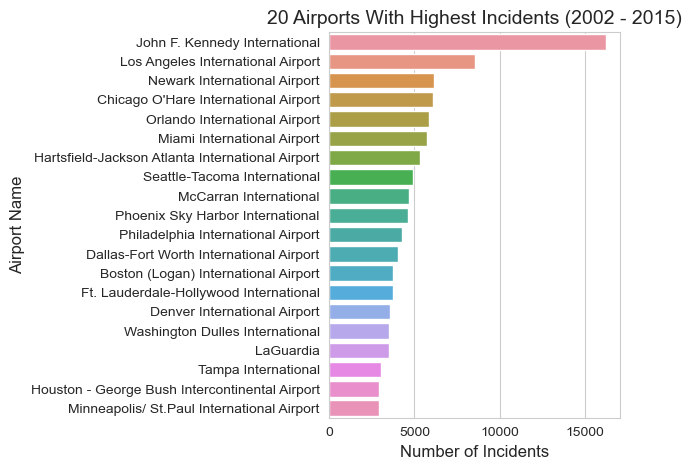

In [184]:
incident_per_airport = df.groupby('Airport Name')['Claim Number'].count().reset_index(name='Count')

sns.barplot(data=incident_per_airport.sort_values('Count', ascending = False).head(20), x='Count', y='Airport Name')
plt.title('20 Airports With Highest Incidents (2002 - 2015)', fontsize=14)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Airport Name', fontsize=12)

plt.tight_layout()
plt.show()

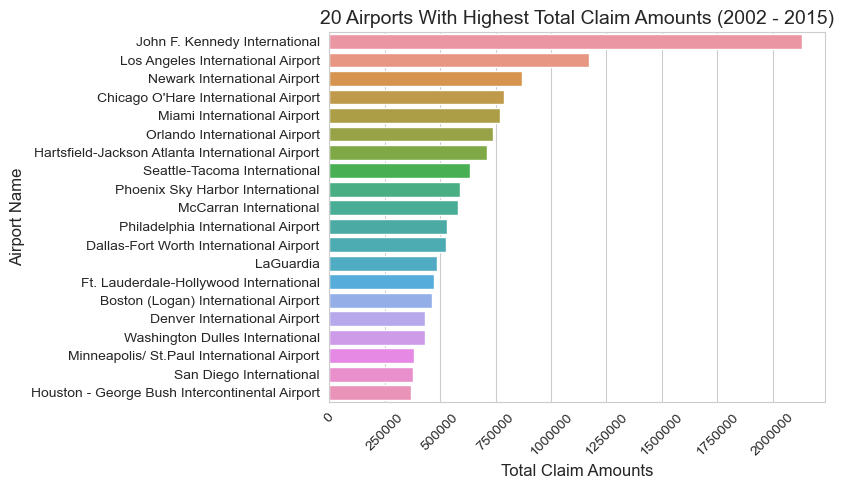

In [185]:
total_per_airport = df.groupby('Airport Name')['Claim Amount'].sum().reset_index(name='Total')

sns.barplot(data=total_per_airport.sort_values('Total', ascending = False).head(20), x='Total', y='Airport Name')
plt.title('20 Airports With Highest Total Claim Amounts (2002 - 2015)', fontsize=14)
plt.xticks(rotation = 45)
plt.xlabel('Total Claim Amounts', fontsize=12)
plt.ylabel('Airport Name', fontsize=12)
formatter = ticker.FormatStrFormatter('%0.0f')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

Informasi yang didapat :

* Bandara dengan jumlah insiden yang paling sering terjadi yakni John F.K Int, LA Int, Newark Int, Newark Int, Chicago O'Hare Int, Orlando Int dan diikuti bandara-bandara lainnya. Bandara-Bandara tersebut memang diketahui merupakan bandara-bandara tersibuk di Amerika.
* John F.K Int memiliki tingkat insiden yang sangat tinggi yakni kurang lebih 16000 insiden. Di bawah itu berkisar kurang lebih 6000 kasus. Ini menandakan bandara John F.K Int perlu diperhatikan lebih terkait pelayanan dan juga kebijakannya.
* Untuk total klaim penumpang, ini tentunya cukup berbanding lurus dengan jumlah insiden. Di mana John F.K Int menempati urutan teratas.
* Jika dipertahatikan, bandara dengan jumlah insiden tertinggi dan total klaim tertinggi adalah bandara internasional.

#### Airline
1. Airline mana saja yang memiliki insiden terbanyak ?.

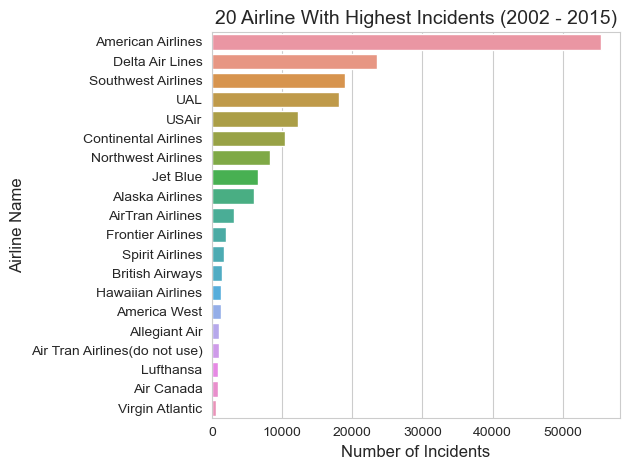

In [186]:
incident_per_airline = df.groupby('Airline Name')['Claim Number'].count().reset_index(name='Count')

sns.barplot(data=incident_per_airline.sort_values('Count', ascending = False).head(20), x='Count', y='Airline Name')
plt.title('20 Airline With Highest Incidents (2002 - 2015)', fontsize=14)
plt.xlabel('Number of Incidents', fontsize=12)
plt.ylabel('Airline Name', fontsize=12)

plt.tight_layout()
plt.show()

Informasi yang didapat :

* Maskapai penerbangan dengan jumlah insiden terbesar secara berturut-turut yakni American Airlines, Delta Air, Southwest Airline, United Airline, US Air, dan seterusnya.
* American Airlines menjadi maskapai penerbangan dengan jumlah insiden mencapai 50 ribu insiden lebih.
* Perlu diketahui, dengan terbatasnya fitur pada dataset, informasi yang dinyatakan dalam grafik tersebut tidak berarti bahwa insiden selalu terkait dengan maskapai penerbangan. Mungkin saja ada indikasi insiden yang terjadi pada ranah maskapai penerbangan seperti kerusakan/kehilangan pada cabin/dalam pesawat atau saat bongkar muat bagasi. Insiden juga mungkin saja terjadi di luar ranah maskapai penerbangan seperti kerusakan/kehilangan saat dilakukan pengecekan/pengamanan oleh pihak TSA. Dalam hal ini, insiden-insiden yang terjadi kebetulan penumpang tersebut sedang menaiki maskapai-maskapai penerbangan di atas.
* Informasi ini digunakan sebagai acuan bagi pihak TSA dan maskapai penerbangan untuk meningkatkan kerjasama dalam hal pelayanan terutama dalam penanganan properti milik penumpang.

#### Claim Type
1. Apa jenis kerugian / jenis klaim yang paling sering dialami oleh penumpang ?
2. Jenis kerugian / jenis klaim apa yang memiliki jumlah dan rata-rata claim terbesar ?

Untuk kedua poin di atas, kita juga akan cek tren per tahunnya.

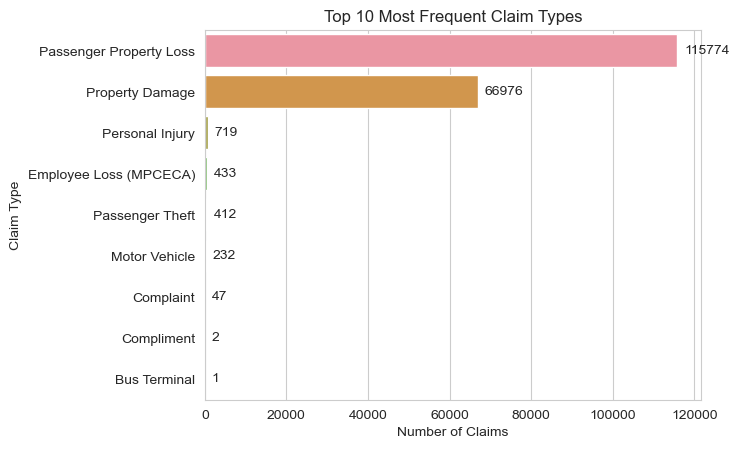

In [187]:
ax = sns.countplot(y='Claim Type', data=df, order=df['Claim Type'].value_counts().index[:10])
plt.title('Top 10 Most Frequent Claim Types')
plt.xlabel('Number of Claims')
plt.ylabel('Claim Type')

for i, v in enumerate(ax.containers[0].get_children()):
    ax.annotate('{:.0f}'.format(v.get_width()), 
                xy=(v.get_width(), v.get_y() + v.get_height() / 2),
                xytext=(5, 0), 
                textcoords='offset points', 
                va='center')
                
plt.show()

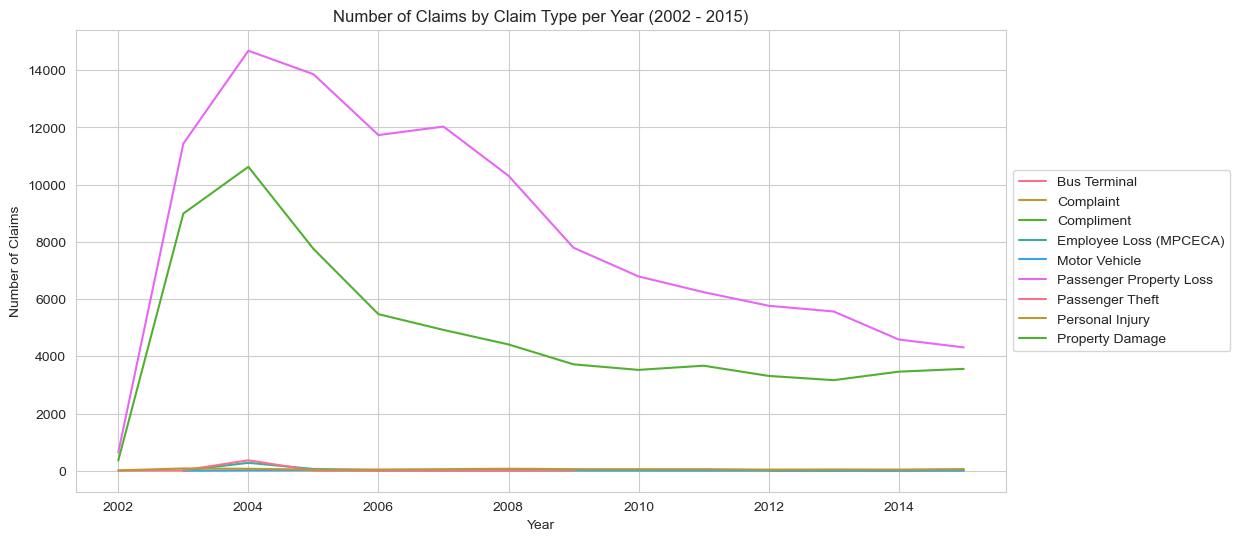

In [188]:
df['Year'] = df['Date Received'].dt.year
claims_per_year = df.groupby(['Claim Type', 'Year'])['Claim Number'].count().reset_index(name='Count')

claims_per_year_pivot = claims_per_year.pivot(index='Year', columns='Claim Type', values='Count')

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plt.plot(claims_per_year_pivot)
plt.legend(claims_per_year_pivot.columns, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Number of Claims by Claim Type per Year (2002 - 2015)')
plt.xlabel('Year')
plt.ylabel('Number of Claims')
plt.show()

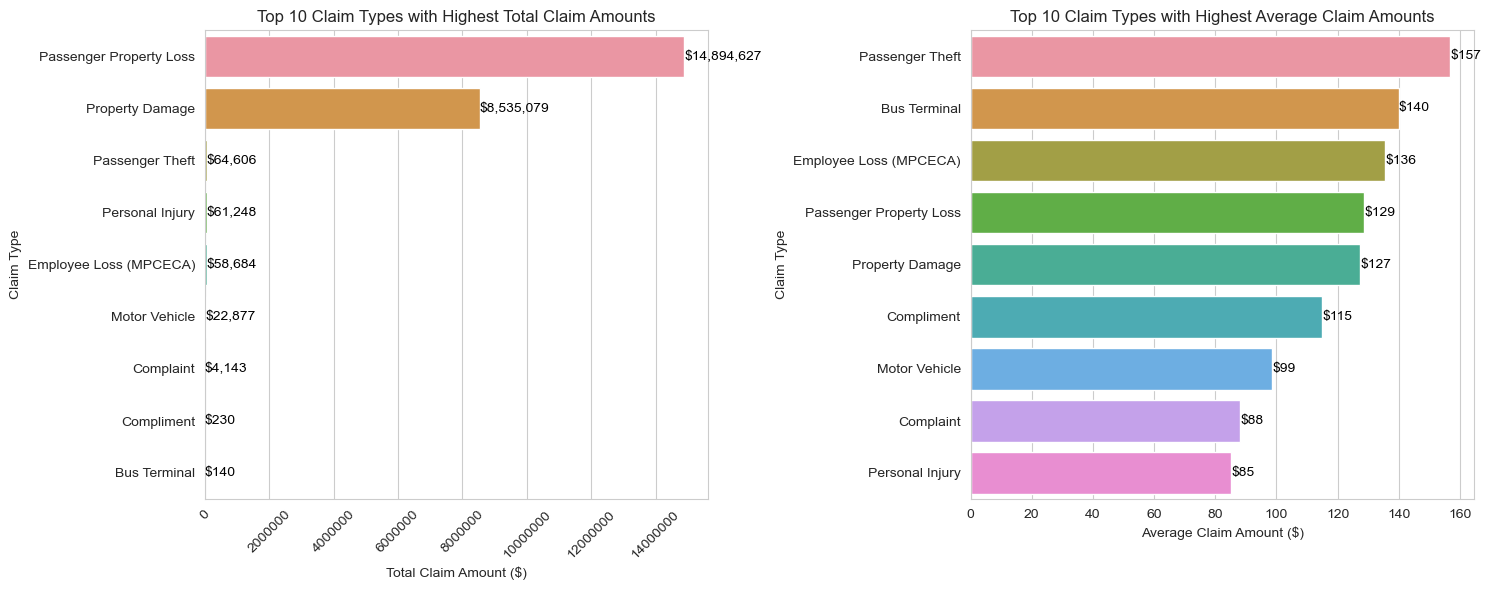

In [189]:
average_per_claim = df.groupby('Claim Type')['Claim Amount'].mean().reset_index(name='Average')
total_per_claim = df.groupby('Claim Type')['Claim Amount'].sum().reset_index(name='Total')

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=total_per_claim.sort_values('Total', ascending=False).head(10), x='Total', y='Claim Type')
plt.title('Top 10 Claim Types with Highest Total Claim Amounts')
plt.xlabel('Total Claim Amount ($)')
plt.ylabel('Claim Type')
plt.xticks(rotation=45)
formatter = ticker.FormatStrFormatter('%0.0f')
plt.gca().xaxis.set_major_formatter(formatter)
for i, v in enumerate(total_per_claim.sort_values('Total', ascending=False).head(10)['Total']):
    plt.text(v, i, '${:,.0f}'.format(v), color='black', va='center')

plt.subplot(1, 2, 2)
sns.barplot(data=average_per_claim.sort_values('Average', ascending=False).head(10), x='Average', y='Claim Type')
plt.title('Top 10 Claim Types with Highest Average Claim Amounts')
plt.xlabel('Average Claim Amount ($)')
plt.ylabel('Claim Type')
for i, v in enumerate(average_per_claim.sort_values('Average', ascending=False).head(10)['Average']):
    plt.text(v, i, '${:,.0f}'.format(v), color='black', va='center')

plt.tight_layout()
plt.show()

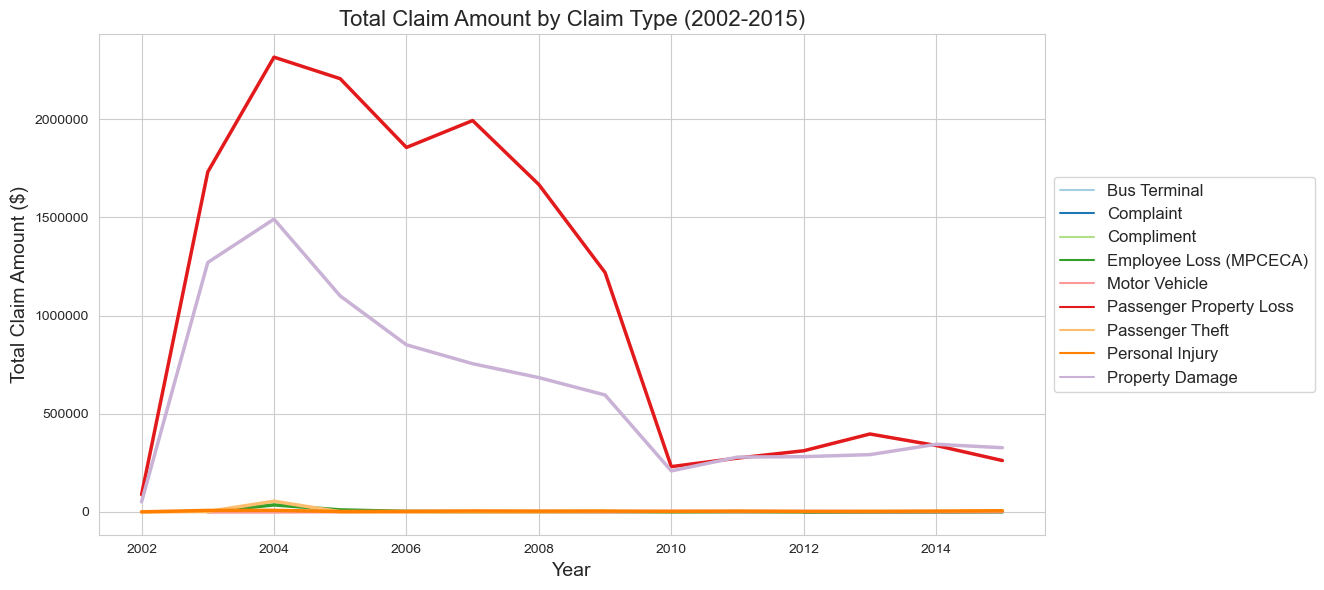

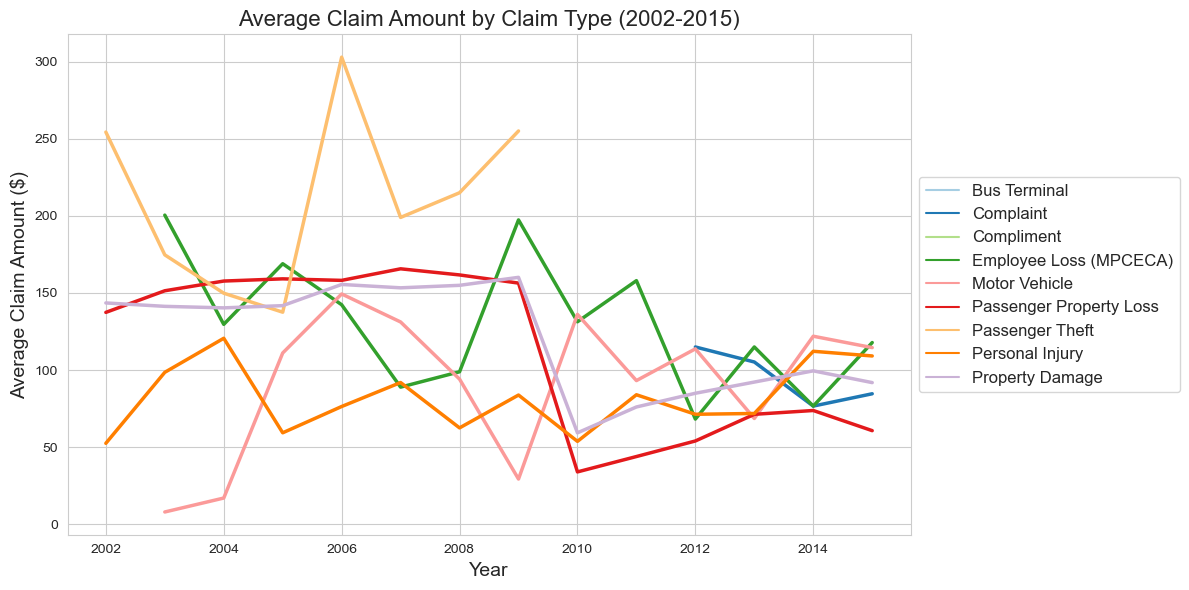

In [190]:
grouped = df.groupby(['Claim Type', 'Year']).agg({'Claim Amount': ['mean', 'sum'], 'Claim Number': 'count'})
grouped = grouped.reset_index()

plt.figure(figsize=(13,6))
sns.set_palette('Paired')
sns.lineplot(data=grouped, x='Year', y=('Claim Amount', 'sum'), hue='Claim Type', linewidth=2.5)
plt.title('Total Claim Amount by Claim Type (2002-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Claim Amount ($)', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
formatter = ticker.FormatStrFormatter('%0.0f')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

plt.figure(figsize=(12,6))
sns.set_palette('Paired')
sns.lineplot(data=grouped, x='Year', y=('Claim Amount', 'mean'), hue='Claim Type', linewidth=2.5)
plt.title('Average Claim Amount by Claim Type (2002-2015)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Claim Amount ($)', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()

Informasi yang didapat :

* Klaim yang paling sering diajukan secara keseluruhan adalah Property Loss dan Property Damage. Sisanya hanya kurang dari seribu kasus.
* Terlihat juga untuk jenis klaim Property Loss dan Property Damage, jumlahnya cenderung menurun dari tahun 2004 hingga 2015.
* Jenis klaim Property Loss dan Property Damage secara keseluruhan adalah juga yang tertinggi dalam hal total besaran klaim yang diajukan.
* Untuk rata-rata besaran klaim yang diajukan berada pada kisaran 80 dollar hingga 160 dollar.
* Jenis klaim Property Loss dan Property Damage secara keseluruhan adalah total besaran klaim yang diajukan juga cenderung menurun dari tahun 2004 hingga 2010. Terutama pada tahun 2010 hingga 2015, yang cukup stabil di antara 300 ribu dollar dan 500 ribu dollar.
* Untuk rata-rata besaran klaim yang diajukan per tahunnya cenderung naik dan turun. Jika kita lihat, jenis komplain passenger theft hanya terjadi sampai tahun 2009.

#### Claim Site
1. Di mana lokasi yang paling sering digunakan penumpang untuk klaim ?

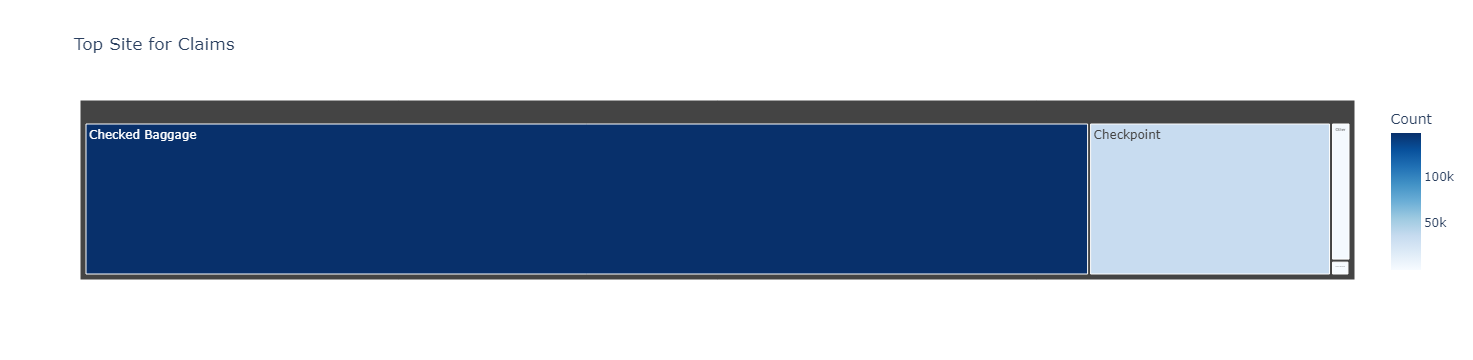

In [191]:
import plotly.express as px

location_counts = df['Claim Site'].value_counts().reset_index()
location_counts.columns = ['Claim Site', 'Count']

fig = px.treemap(location_counts, 
                 path=['Claim Site'], 
                 values='Count',
                 color='Count',
                 color_continuous_scale='blues',
                 title='Top Site for Claims')
fig.show()

Informasi yang didapat :

* Checked Baggage dan Checkpoint adalah tempat yang sering dijadikan klaim.

#### Item
1. Jenis barang apa yang paling sering di klaim ?

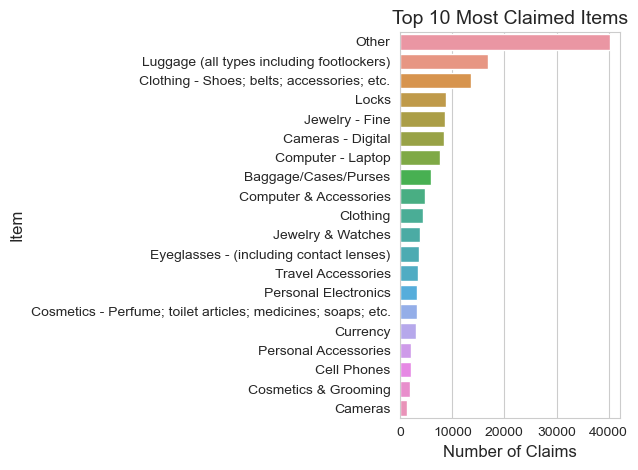

In [192]:
item_counts = df.groupby('Item')['Claim Number'].count().reset_index(name='Count')

# Sort by count in descending order
item_counts = item_counts.sort_values('Count', ascending=False)

# Visualize the top 10 most claimed items
sns.barplot(data=item_counts.head(20), x='Count', y='Item')
plt.title('Top 10 Most Claimed Items', fontsize=14)
plt.xlabel('Number of Claims', fontsize=12)
plt.ylabel('Item', fontsize=12)
plt.tight_layout()
plt.show()

Informasi yang didapat :

* Jenis item 'Other' merupakan yang paling banyak dijadikan klaim oleh penumpang. Jenis item 'Other' tidak diberikan keterangan apa pun dalam dataset.
* Sisanya seperti Pakaian, Elektronik, dan Perhiasan cukup mendomonasi.

#### Status dan Disposition
1. Berapa proporsi status dan disposisi ?

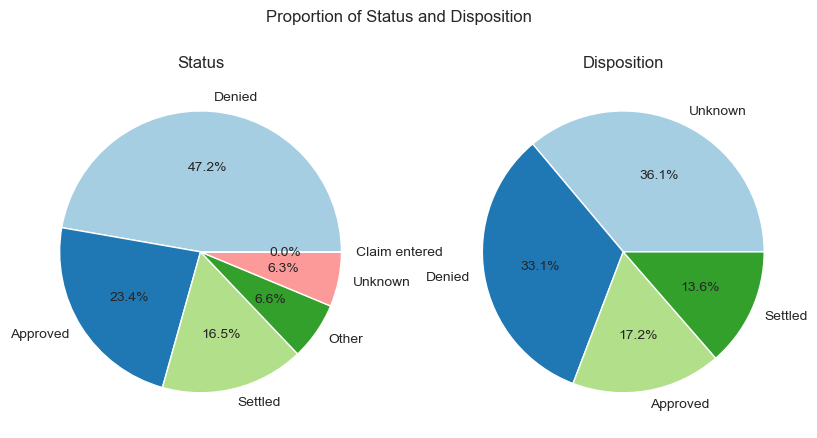

In [193]:
status_counts = df['Status'].value_counts()
disposition_counts = df['Disposition'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Proportion of Status and Disposition')

sns.set_palette('pastel')
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
axes[0].set_title('Status')

sns.set_palette('dark')
axes[1].pie(disposition_counts, labels=disposition_counts.index, autopct='%1.1f%%')
axes[1].set_title('Disposition')

plt.show()

Informasi yang didapat :

* Status denied mendominasi proporsi untuk fitur status sebesar 47.2%, diikuti approved 23.4%, settled 16.5%, other 6.6%, dan unknown '6.3%'.
* Status unknown mendominasi proporsi untuk fitur disposisi sebesar 36.1%, diikuti denied 33.1%, approved 17.2%, dan settled '13.6%'.
* Banyaknya proporsi denied pada status dan disposisi dapat disebabkan oleh berbagai faktor seperti kurangnya bukti atau kesalahan dalam mengajukan klaim.

#### Day Differences
1. Berapa lama rata-rata waktu yang dibutuhkan untuk melakukan klaim sejak insiden tersebut terjadi ?

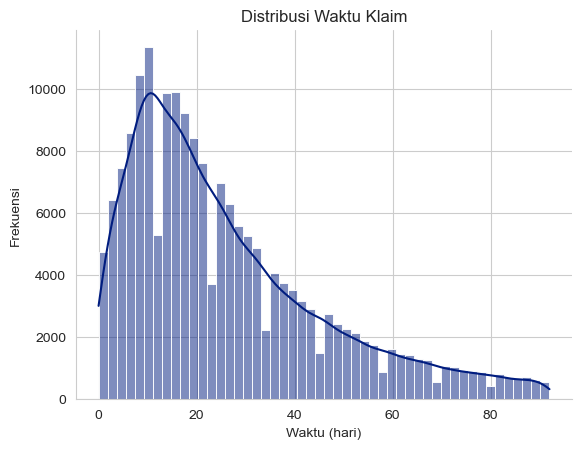

In [194]:
# Menghitung rata-rata waktu klaim
avg_claim_time = df['Day Differences'].mean()

# Membuat histogram
sns.histplot(data=df, x='Day Differences', bins=50, kde=True)
sns.despine()
sns.set_style('whitegrid')
plt.title('Distribusi Waktu Klaim')
plt.xlabel('Waktu (hari)')
plt.ylabel('Frekuensi')
plt.show()

Informasi yang didapat:
* Grafik menunjukkan right-skewed distribution dan puncak frekuensi pada rentang 0 hingga 30 hari.
* Hal ini menunjukkan bahwa korban kehilangan atau kerusakan barang cenderung segera mengajukan klaim setelah insiden terjadi, sehingga memungkinkan TSA untuk segera menangani klaim tersebut.

# Kesimpulan dan Rekomendasi

Kesimpulan :

1. Peningkatan jumlah penumpang dan insiden terjadi di musim panas, natal dan tahun baru.
2. Secara keseluruhan, jumlah yang dibayarkan oleh TSA masih lebih kecil daripada yang diklaim oleh penumpang, tetapi pada tahun 2010 hingga 2015 masih terdapat proporsi yang lebih pada jumlah yang dibayarkan oleh TSA daripada yang diklaim oleh penumpang. Di samping itu, TSA telah berhasil meminimalkan kerugian sebesar 5.843.344 dolar pada periode 2002-2015. Meskipun demikian, TSA masih harus membayar kerugian lebih sebesar 599.977 dolar selama periode yang sama. Selain itu, dapat disimpulkan bahwa TSA telah berhasil mengurangi total kemungkinan kerugian selama periode 2002-2015 dan berhasil mengelola risiko dengan efektif.
3. Bandara International adalah yang paling sering terjadi insiden.
4. Masih cukup banyak kemungkinan insiden yang terjadi di ranah maskapai penerbangan.
5. Mayoritas penumpang mengalami insiden dan kerugian untuk jenis klaim Property Loss dan Property Damage.
6. Jenis kerugian atau klaim yang memiliki rata-rata claim terbesar dapat membantu kita memahami seberapa besar nilai kerugian atau klaim yang diharapkan dapat kita terima jika mengalami kerugian atau klaim yang sama.
7. Checked Baggage dan Checkpoint menjadi tempat yang sering dijadikan tempat klaim oleh penumpang.
8. Pakaian, barang mudah rusak, dan barang berharga mendominasi jenis item yang diklaim oleh penumpang.
9. Bahwa sebagian besar klaim yang diajukan oleh penumpang TSA ditolak. Hal ini dapat disebabkan oleh berbagai faktor seperti kurangnya bukti atau kesalahan dalam mengajukan klaim.
10. Sebagian besar pelanggan mengajukan klaim mereka dalam waktu relatif cepat setelah insiden terjadi. Namun, beberapa insiden  memerlukan waktu lebih lama untuk diajukan klaim oleh penumpang. Beberapa faktor yang dapat menyebabkan beberapa insiden memerlukan waktu lebih lama untuk diajukan klaim oleh penumpang antara lain:

     - Ketidaktahuan: Penumpang mungkin tidak tahu bahwa mereka memiliki hak untuk mengajukan klaim kepada TSA atau tidak tahu bagaimana cara mengajukan klaim.
     - Kelalaian: Penumpang mungkin lupa atau tidak memprioritaskan untuk mengajukan klaim mereka setelah insiden terjadi.
     - Kompleksitas: Beberapa jenis klaim mungkin lebih rumit atau memerlukan lebih banyak dokumen untuk diajukan, sehingga memerlukan waktu lebih lama bagi penumpang untuk menyelesaikannya.
     - Keterbatasan waktu: Penumpang mungkin sibuk dengan jadwal perjalanan dan tidak memiliki waktu atau kesempatan untuk mengajukan klaim segera setelah insiden terjadi. 


Rekomendasi :
1. Peningkatan keamanan dan pemeriksaan yang lebih ketat pada saat musim liburan atau saat jumlah penumpang meningkat. Memperketat pengawasan dan peningkatan jumlah personel di bandara pada musim-musim tersebut untuk memastikan bahwa penumpang dan propertinya tetap aman dan terhindar dari insiden. Selain itu, TSA juga perlu meningkatkan kesadaran dan edukasi kepada penumpang tentang tindakan pencegahan dan keamanan selama bepergian pada musim ramai.
2. Lakukan evaluasi ulang kebijakan pembayaran dan mengkaji kembali jumlah yang dibayarkan kepada penumpang, sehingga dapat memastikan bahwa jumlah yang dibayarkan tidak berlebihan atau kurang dari yang seharusnya. TSA juga dapat meningkatkan transparansi dengan memberikan informasi yang lebih jelas dan terperinci tentang proses klaim dan pembayaran, sehingga penumpang dapat memahami secara lebih baik mengapa jumlah yang dibayarkan mungkin lebih rendah daripada yang mereka klaimkan. Hal-hal ini bertujuan untuk semaksimal mungkin mengurangi kelebihan pembayaran tetapi juga masih memberikan pembayaran yang sesuai dan adil kepada penumpang yang mengalami kerugian atau kerusakan pada barang mereka.
3. TSA harus memprioritaskan pengawasan dan tindakan pencegahan di bandara-bandara internasional yang memiliki tingkat insiden lebih tinggi untuk mengetahui faktor penyebab dan mencegah terjadinya insiden berulang. Jika memungkinkan lakukan evaluasi pada bandara internasional lain yang memiliki tingkat penerbangan tinggi tetapi tingkat insidennya rendah untuk menerapkan kebijakan prosedur yang sama (Hal ini tidak dapat dilakukan karena dataset TSA Claim hanya berisi jumlah insiden dan klaim, tidak berisi jumlah penerbangan itu sendiri di luar insiden yang terjadi).
4. Maskapai penerbangan harus memperketat protokol keamanan dan meningkatkan pelatihan karyawan dalam mengatasi situasi darurat dan pencegahan insiden. Selain itu, maskapai penerbangan juga harus memastikan bahwa peralatan dan fasilitas yang digunakan dalam operasi penerbangan selalu dalam kondisi baik dan sesuai standar keamanan. TSA dan maskapai penerbangan perlu meningkatkan kerjasama dan koordinasi dalam hal pelayanan terutama dalam penanganan properti milik penumpang.
5. Jadikan penanganan jenis klaim Property Loss dan Property Damage sebagai fokus utama untuk dilakukan perbaikan. TSA perlu melakukan evaluasi dan perbaikan pada prosedur, peralatan, dan petugas lapangan yang digunakan dalam pengelolaan bagasi penumpang untuk meminimalkan risiko kerusakan atau kehilangan barang penumpang.
6. Lakukan evaluasi risiko dan buat keputusan manajemen keuangan berdasarkan rata-rata claim dari jenis kerugian atau klaim tertentu dan mengembangkan strategi manajemen risiko yang tepat untuk mencegah atau mengurangi kerugian yang mungkin terjadi. Beri himbauan juga terkait asuransi atau perlindungan lainnya yang mungkin perlu penumpang peroleh untuk melindungi diri mereka dari kerugian atau klaim yang terkait dengan jenis kerugian atau klaim tersebut.
7. TSA perlu memperketat pengawasan, mengalokasikan personel yang sesuai, dan meningkatkan pelatihan personel dalam pengelolaan keamanan di checkpoint dan pengelolaan bagasi (Checked Baggage) untuk mengantisipasi banyaknya penumpang yang mengajukan klaim sehingga terhindar dari miss atau sembarang klaim yang masuk dan disetujui.
8. TSA harus memperketat pengawasan, memperbaiki proses pemeriksaan, dan meningkatkan kehati-kehatian pengelolaan bagasi penumpang, terutama pada barang berharga dan mudah rusak, seperti perlengkapan elektronik atau perhiasan.
9. Berikan himbauan agar penumpang lebih berhati-hati dalam mengajukan klaim dan memastikan bahwa mereka memiliki bukti yang cukup untuk menunjukkan kerugian atau kehilangan yang mereka alami. Selain itu, TSA dapat memberikan edukasi kepada penumpang tentang cara mengajukan klaim yang benar dan berikan panduan pemahaman yang jelas tentang jenis-jenis insiden yang dapat di-klaim dan persyaratan yang diperlukan untuk memenuhi kriteria klaim, sehingga pelanggan dapat mempersiapkan dokumen yang dibutuhkan dengan lebih baik untuk dapat memperoleh ganti rugi dari TSA.
10. Perlu adanya pengumuman atau edukasi yang lebih efektif terkait proses klaim. Hal ini bertujuan untuk mempercepat waktu pengajuan klaim dan meminimalkan risiko kerugian yang mungkin dialami oleh pelanggan akibat penundaan klaim yang terlalu lama. Berikut rinciannya :

    - Memberikan informasi tentang hak mereka untuk mengajukan klaim dan proses pengajuan klaim. Hal ini dapat dilakukan melalui media sosial, situs web TSA, brosur, atau informasi yang diberikan saat proses pemeriksaan.
    - Memberikan akses dan informasi yang mudah diakses bagi penumpang yang ingin mengajukan klaim. Hal ini dapat dilakukan dengan menyediakan formulir pengajuan klaim secara online atau dengan memastikan bahwa informasi tentang pengajuan klaim tersedia di bandara dan situs web TSA.
    - Memperluas Layanan Online: TSA dapat memperluas layanan online dengan menyediakan platform online yang lebih mudah diakses dan digunakan oleh pelanggan untuk mengajukan klaim, sehingga dapat mempercepat proses klaim dan mengurangi keterbatasan waktu bagi pelanggan yang sibuk.
    - Meningkatkan Transparansi: TSA dapat meningkatkan transparansi dengan memberikan informasi yang lebih jelas dan terperinci tentang proses klaim dan status klaim yang sedang diproses, sehingga pelanggan dapat memahami di mana posisi klaim mereka dan waktu yang dibutuhkan untuk menyelesaikan klaim.